# Coursework - 001447349 - Ganesh Ramakrishnan

### Import tables from csv's

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Daily Customer visits to the company's 40 stores
store_customers = pd.read_csv("StoreDailyCustomers.csv", parse_dates=["Date"],date_format="%d-%m-%Y",index_col="Date")
store_customers.head()

RBZ  VBO   WHI  QOU  WWU  UPM  XCM   VVE  RIK  UJB  ...  YQR  WQK  \
Date                                                            ...             
2023-01-01    0  512  1146    0   50  554   96  1177    0  504  ...   88   76   
2023-01-02    0  505   967    0   59  544   61  1017    0  456  ...   84   57   
2023-01-03    0  457  1020    0   66  514   99   966    0  434  ...   80   65   
2023-01-04    0  440   668    0   47  472   99   820    0  410  ...   87   72   
2023-01-05    0  436   767    0   77  486   85   752    0  385  ...   89   56   

            UVL  QUF  IIU  SJR  XKX  TBH  BCD  VKP  
Date                                                
2023-01-01   76    0   68  364   86  319   63   65  
2023-01-02   56    0   97  295   75  268   51   72  
2023-01-03   75    0   94  313   99  365   62   60  
2023-01-04   83    0   81  340   93  255   58   68  
2023-01-05   70    0   52  263   88  374   61   68  

[5 rows x 40 columns]

In [4]:
store_customers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RBZ     365 non-null    int64
 1   VBO     365 non-null    int64
 2   WHI     365 non-null    int64
 3   QOU     365 non-null    int64
 4   WWU     365 non-null    int64
 5   UPM     365 non-null    int64
 6   XCM     365 non-null    int64
 7   VVE     365 non-null    int64
 8   RIK     365 non-null    int64
 9   UJB     365 non-null    int64
 10  YWC     365 non-null    int64
 11  GCC     365 non-null    int64
 12  WPT     365 non-null    int64
 13  RVP     365 non-null    int64
 14  HOF     365 non-null    int64
 15  FWI     365 non-null    int64
 16  AQZ     365 non-null    int64
 17  GIN     365 non-null    int64
 18  VCF     365 non-null    int64
 19  ZCW     365 non-null    int64
 20  ICK     365 non-null    int64
 21  AIO     365 non-null    int64
 22  WBY     365 non-null    int64
 

In [5]:
# Total marketing spend of each store for the year
store_marketing = pd.read_csv("StoreMarketing.csv", index_col=["Id"])
store_marketing.head()

Marketing (£)
Id                
RBZ           2000
VBO          21000
WHI          27000
QOU           1000
WWU           2000

In [6]:
# Total overhead costs for each store for the year

store_overhead = pd.read_csv("StoreOverheads.csv", index_col=["Id"])
store_overhead.head()

Overheads (£)
Id                
RBZ          98000
VBO          39000
WHI          95000
QOU          28000
WWU          98000

In [7]:
#Floor size in meter sqr data

store_size = pd.read_csv("StoreSize.csv", index_col=["Id"])
store_size.head()

Size (msq)
Id             
RBZ         210
VBO        3773
WHI        6534
QOU          71
WWU         204

In [8]:
# Total number of staff in each store for the year

store_staff = pd.read_csv("StoreStaff.csv",index_col=["Id"])
store_staff.head()

Staff
Id        
RBZ      2
VBO     23
WHI     45
QOU      1
WWU      2

### Sorting the shops based on the highest to lowest customer counts

In [9]:
sorted_stores = store_customers.mean().sort_values(ascending=False).index

In [10]:
sorted_store_customers = store_customers[sorted_stores]
sorted_store_customers.head()

WPT   VVE   WBY   WHI  UPM  TVW  VBO  UJB  SPC  RVP  ...  GIN  \
Date                                                              ...        
2023-01-01  1082  1177  1013  1146  554  679  512  504  449  432  ...   67   
2023-01-02  1014  1017   892   967  544  561  505  456  430  450  ...   61   
2023-01-03   951   966   783  1020  514  512  457  434  368  341  ...   54   
2023-01-04   953   820   777   668  472  322  440  410  335  329  ...   61   
2023-01-05   803   752   780   767  486  466  436  385  352  335  ...   72   

            WWU  AIO  RBZ  BCD  AQZ  ZWJ  QUF  QOU  RIK  
Date                                                     
2023-01-01   50  103    0   63    0    0    0    0    0  
2023-01-02   59   85    0   51    0    0    0    0    0  
2023-01-03   66  104    0   62    0    0    0    0    0  
2023-01-04   47   94    0   58    0    0    0    0    0  
2023-01-05   77  100    0   61    0    0    0    0    0  

[5 rows x 40 columns]

### Joining the overall tables holding store specific data with each other

In [11]:
store_data = store_marketing.join(store_overhead,how="left",on="Id").join(store_staff,how="left",on="Id").join(
    store_size,how="left",on="Id"
)
store_data

Marketing (£)  Overheads (£)  Staff  Size (msq)
Id                                                  
RBZ           2000          98000      2         210
VBO          21000          39000     23        3773
WHI          27000          95000     45        6534
QOU           1000          28000      1          71
WWU           2000          98000      2         204
UPM          17000          52000     11        1227
XCM           4000          72000      6         690
VVE          30000          39000     24        3627
RIK           1000          41000      1          63
UJB          21000          71000      9        1876
YWC           3000          43000      3         276
GCC           2000          25000      4         510
WPT          40000          81000     17        3482
RVP          13000          97000     21        2876
HOF           3000          94000      3         251
FWI           3000          83000      2         176
AQZ           2000          57000      1          95
GIN           3000          57000      2         260
VCF           2000          99000      3         342
ZCW           3000          14000      5         519
ICK           4000          51000      3         230
AIO           2000          60000      4         355
WBY          28000          34000     37        6796
FOX           3000          79000      2         237
HWR           3000          88000      4         685
ZWJ           1000          86000      2         214
TVW          15000          52000     30        3054
VPA           4000          79000      2         194
SPC          13000          78000     13        1884
ZIG           3000          36000      4         512
YQR           4000          44000      2         173
WQK           3000          65000      5         488
UVL           3000          51000      3         320
QUF           1000          77000      2         184
IIU           3000          11000      3         323
SJR          12000          24000     12        1277
XKX           3000          58000      3         341
TBH          16000          53000     12        2174
BCD           1000          65000      1         102
VKP           3000          24000      2         308

### Visualize the total Customer intake by each store

<Axes: xlabel='Stores', ylabel='Sum'>

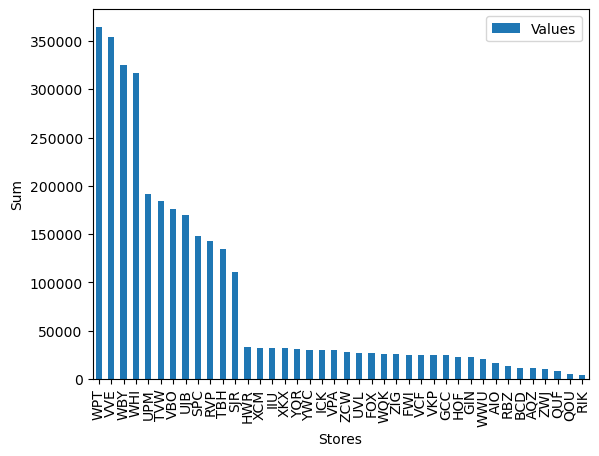

In [103]:
sum_store_cust = pd.DataFrame({"Values":sorted_store_customers.sum()})

sum_store_cust.plot(kind="bar",legend=True,xlabel="Stores",ylabel="Sum",layout=(20,10),rot=90)

### Splitting the stores based on volume for better visualization

In [104]:
def cust_volume(cust):
    if cust >= 200000:
        return "High Volume"
    elif cust >= 50000 and cust < 200000:
        return "Medium Volume"
    elif cust >= 20000 and cust < 50000:
        return "Low Volume"
    else:
        return "Very Low Volume"

sum_store_cust["Volume Type"] = sum_store_cust["Values"].apply(cust_volume)
sum_store_cust

Values      Volume Type
WPT  364531      High Volume
VVE  354622      High Volume
WBY  324745      High Volume
WHI  316621      High Volume
UPM  191523    Medium Volume
TVW  184417    Medium Volume
VBO  175624    Medium Volume
UJB  169422    Medium Volume
SPC  148067    Medium Volume
RVP  142807    Medium Volume
TBH  134284    Medium Volume
SJR  111013    Medium Volume
HWR   33626       Low Volume
XCM   32346       Low Volume
IIU   31939       Low Volume
XKX   31687       Low Volume
YQR   30842       Low Volume
YWC   30439       Low Volume
ICK   29931       Low Volume
VPA   29604       Low Volume
ZCW   28027       Low Volume
UVL   27186       Low Volume
FOX   26504       Low Volume
WQK   25859       Low Volume
ZIG   25362       Low Volume
FWI   25333       Low Volume
VCF   25005       Low Volume
VKP   24818       Low Volume
GCC   24360       Low Volume
HOF   22692       Low Volume
GIN   22455       Low Volume
WWU   20951       Low Volume
AIO   16876  Very Low Volume
RBZ   13714  Very Low Volume
BCD   11075  Very Low Volume
AQZ   10953  Very Low Volume
ZWJ   10142  Very Low Volume
QUF    8543  Very Low Volume
QOU    4915  Very Low Volume
RIK    4226  Very Low Volume

### Visualising the various types of volumes in a bar plot

In [105]:
high_vol_index= sum_store_cust[sum_store_cust["Volume Type"] == "High Volume"].index
med_vol_index= sum_store_cust[sum_store_cust["Volume Type"] == "Medium Volume"].index
low_vol_index= sum_store_cust[sum_store_cust["Volume Type"] == "Low Volume"].index
vlow_vol_index= sum_store_cust[sum_store_cust["Volume Type"] == "Very Low Volume"].index

In [161]:
segment_colours = {  
    'Very Low Volume': 'black',
    'Low Volume': 'red',
    'Medium Volume': 'orange',
    'High Volume': 'green',
}

colours = []
for name in sum_store_cust["Volume Type"]:
    if name in segment_colours:
        colour = segment_colours[name]
        colours.append(colour)

### Segmentation

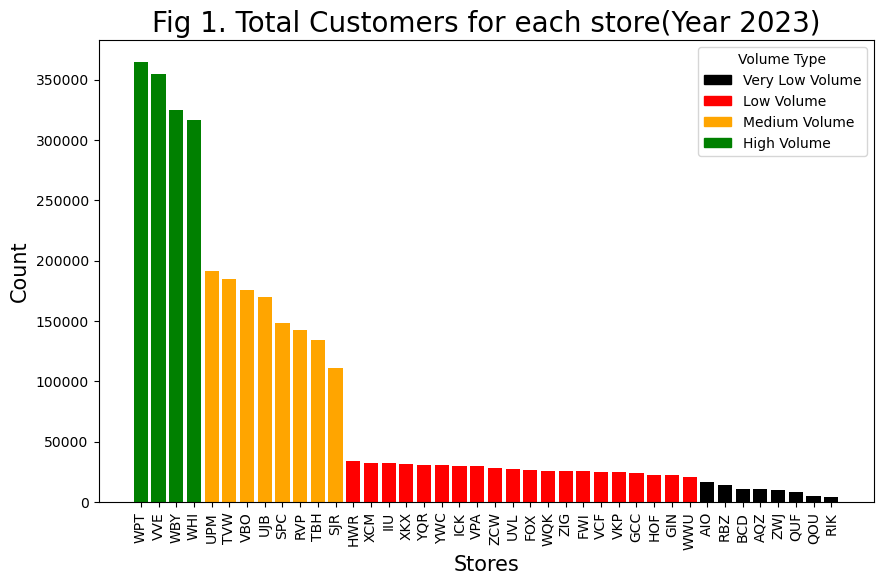

In [110]:
from matplotlib.patches import Patch

plt.figure(figsize=(10, 6))
#x_pos = np.arange(len(sum_store_cust["Values"]))
plt.bar(sum_store_cust.index,sum_store_cust["Values"], align='center', color=colours)
plt.xticks(sum_store_cust.index, rotation = 90)
plt.xlabel('Stores', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Fig 1. Total Customers for each store(Year 2023)', fontsize=20)

legend_handles = [Patch(color=color, label=label) for label, color in segment_colours.items()]
plt.legend(handles=legend_handles, title="Volume Type")

plt.show()

<Figure size 10000x1500 with 0 Axes>

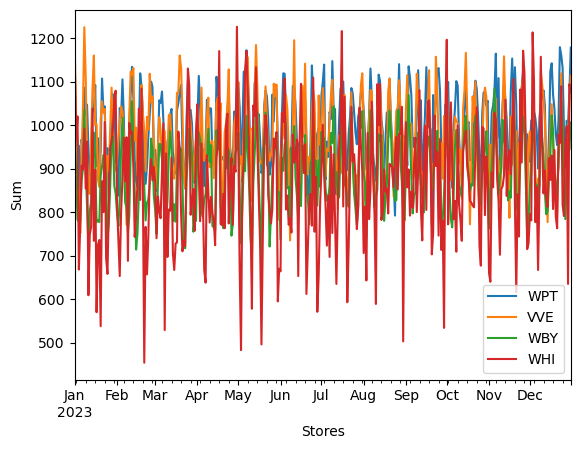

<Figure size 10000x1500 with 0 Axes>

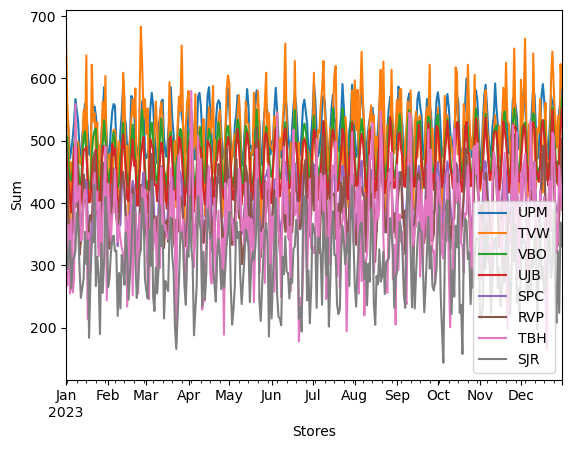

<Figure size 10000x1500 with 0 Axes>

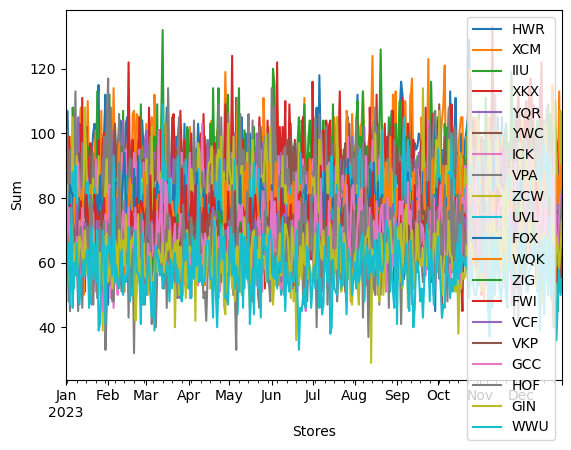

<Figure size 10000x1500 with 0 Axes>

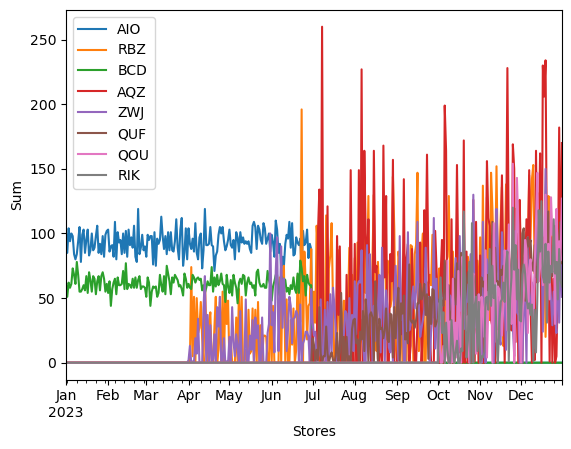

<Figure size 10000x1500 with 0 Axes>

In [13]:
sorted_store_customers[high_vol_index].plot(kind="line",legend=True,xlabel="Stores",ylabel="Sum",rot=0)
plt.figure(figsize=(100,15))
sorted_store_customers[med_vol_index].plot(kind="line",legend=True,xlabel="Stores",ylabel="Sum",rot=0)
plt.figure(figsize=(100,15))
sorted_store_customers[low_vol_index].plot(kind="line",legend=True,xlabel="Stores",ylabel="Sum",rot=0)
plt.figure(figsize=(100,15))
sorted_store_customers[vlow_vol_index].plot(kind="line",legend=True,xlabel="Stores",ylabel="Sum",rot=0)
plt.figure(figsize=(100,15))

### Visualization with rolling averages for the various volume times

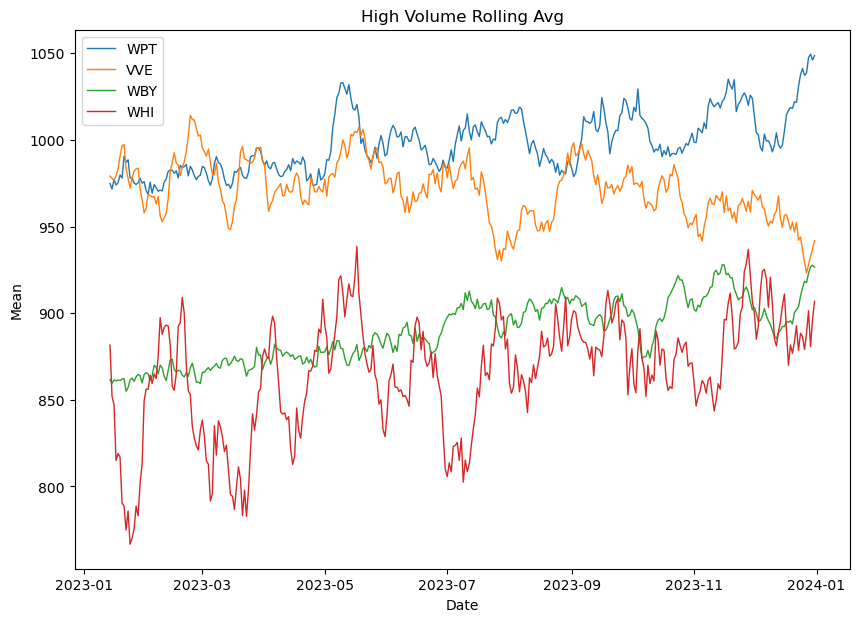

In [77]:
plt.figure(figsize=(10,7))
plt.title("High Volume Rolling Avg")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[high_vol_index].rolling(window=14).mean(),lw=1)
plt.legend(high_vol_index)

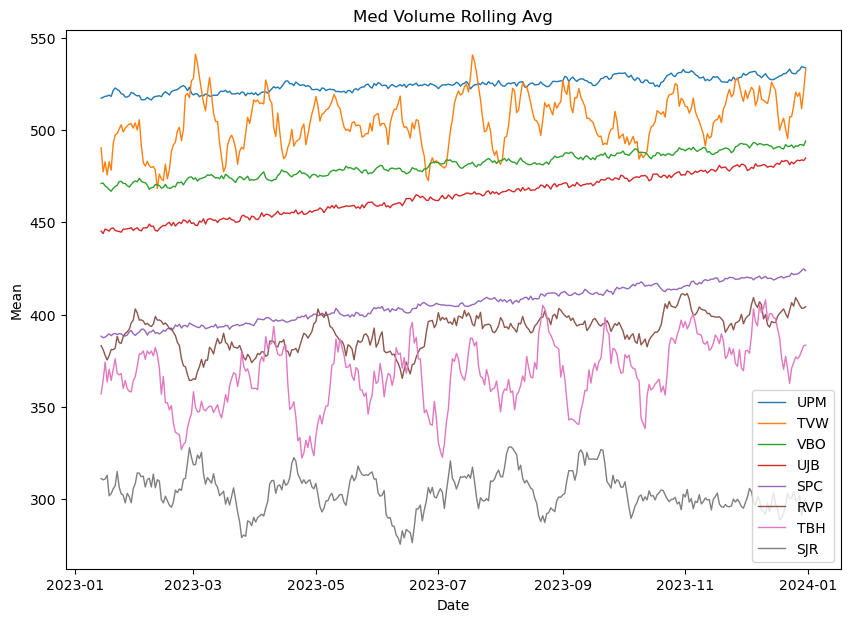

In [83]:
plt.figure(figsize=(10,7))
plt.title("Med Volume Rolling Avg")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[med_vol_index].rolling(window=14).mean(),lw=1)
plt.legend(med_vol_index)

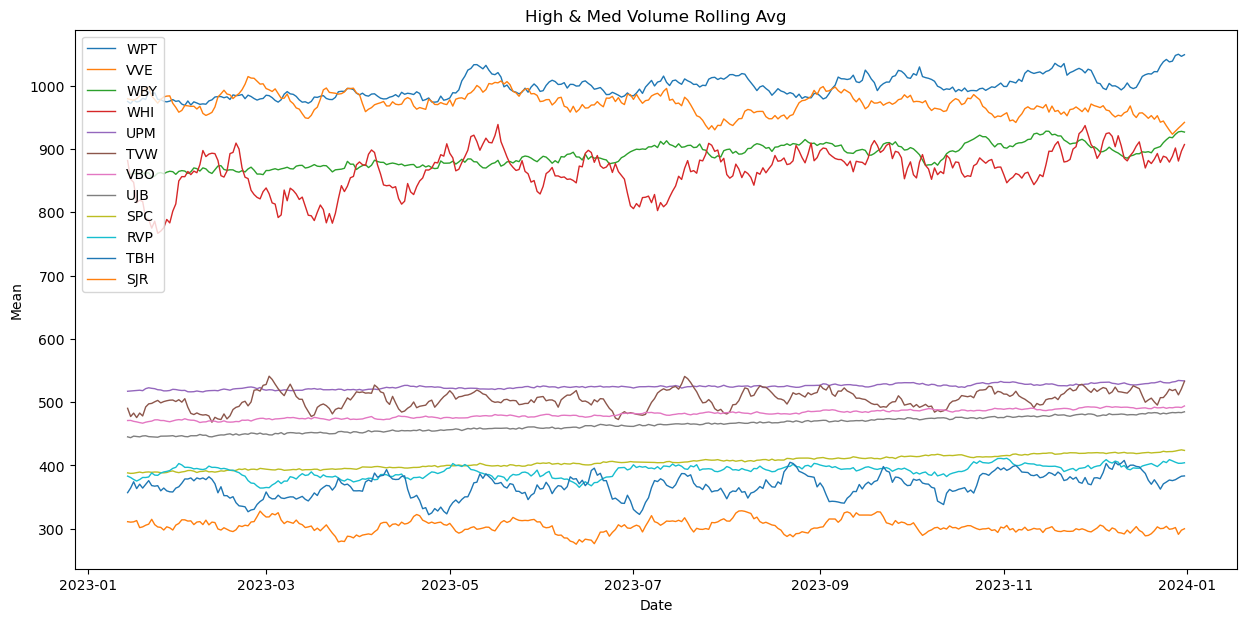

In [51]:

# high_avg = sorted_store_customers[high_vol_index].mean(axis=1)
# med_avg = sorted_store_customers[med_vol_index].mean(axis=1)

# # Rolling average (14-day)
# high_roll = high_avg.rolling(window=14).mean()
# med_roll = med_avg.rolling(window=14).mean()

# # Plot both on same axis
# plt.figure(figsize=(12, 6))
# plt.plot(high_roll, label="High Volume (Rolling Avg)", linewidth=2)
# plt.plot(med_roll, label="Medium Volume (Rolling Avg)", linewidth=2)
# plt.title("Rolling Average of Daily Customers: High vs Medium Volume Stores")
# plt.xlabel("Date")
# plt.ylabel("Average Customers")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(15,7))
plt.title("High & Med Volume Rolling Avg")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[high_vol_index].rolling(window=14).mean(),lw=1)
plt.plot(sorted_store_customers[med_vol_index].rolling(window=14).mean(),lw=1)
plt.legend(high_vol_index.append(med_vol_index),loc='upper left')


In [127]:
plot = (sorted_store_customers[high_vol_index.append(med_vol_index)].rolling(window=14).mean()).hvplot.line(frame_height=600, frame_width=1000,
    xlabel='Date', ylabel='Rolling Avg', title="Fig 2. High vs Medium Volume Interactive Rolling Avg Line Plot")
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(NdOverlay, sizing_mode='fixed')

In [45]:
print(high_vol_index.append(med_vol_index))

Index(['WPT', 'VVE', 'WBY', 'WHI', 'UPM', 'TVW', 'VBO', 'UJB', 'SPC', 'RVP',
       'TBH', 'SJR'],
      dtype='object')


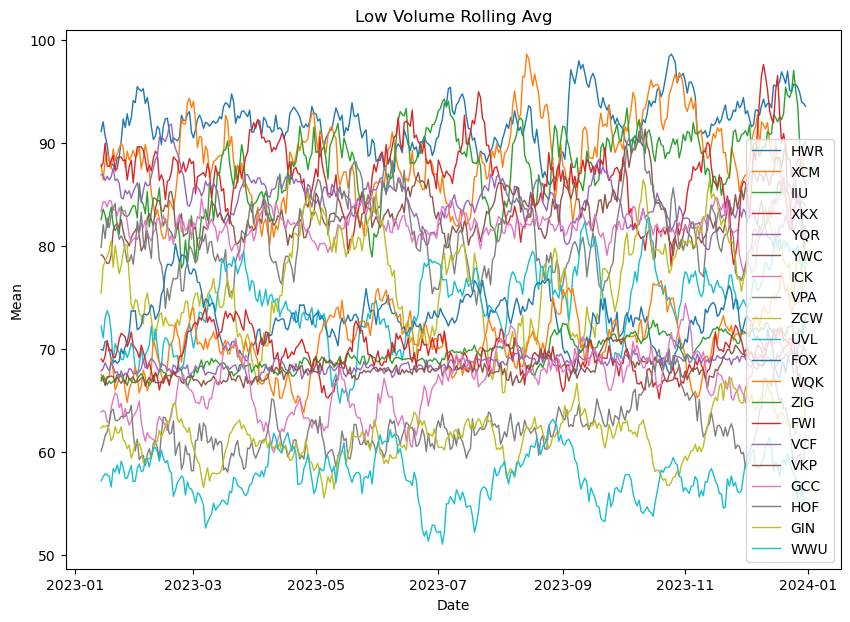

In [84]:
plt.figure(figsize=(10,7))
plt.title("Low Volume Rolling Avg")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[low_vol_index].rolling(window=14).mean(),lw=1)
plt.legend(low_vol_index)

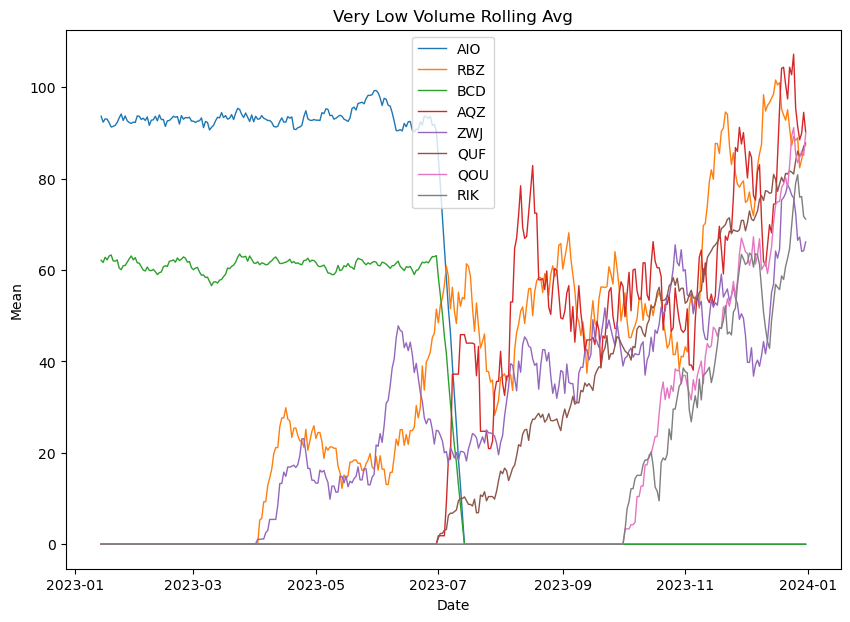

In [85]:
plt.figure(figsize=(10,7))
plt.title("Very Low Volume Rolling Avg")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[vlow_vol_index].rolling(window=14).mean(),lw=1)
plt.legend(vlow_vol_index)

### Applying Trend lines to the plots above

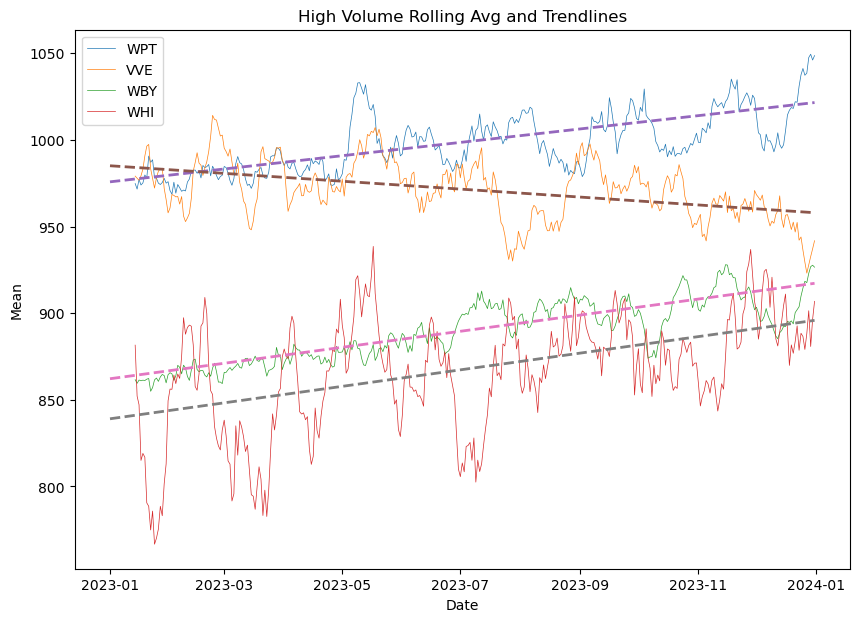

In [100]:
# High vol trend line

plt.figure(figsize=(10,7))
plt.title("High Volume Rolling Avg and Trendlines")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[high_vol_index].rolling(window=14).mean(),lw=0.5)
plt.legend(high_vol_index)
for name in high_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=2)

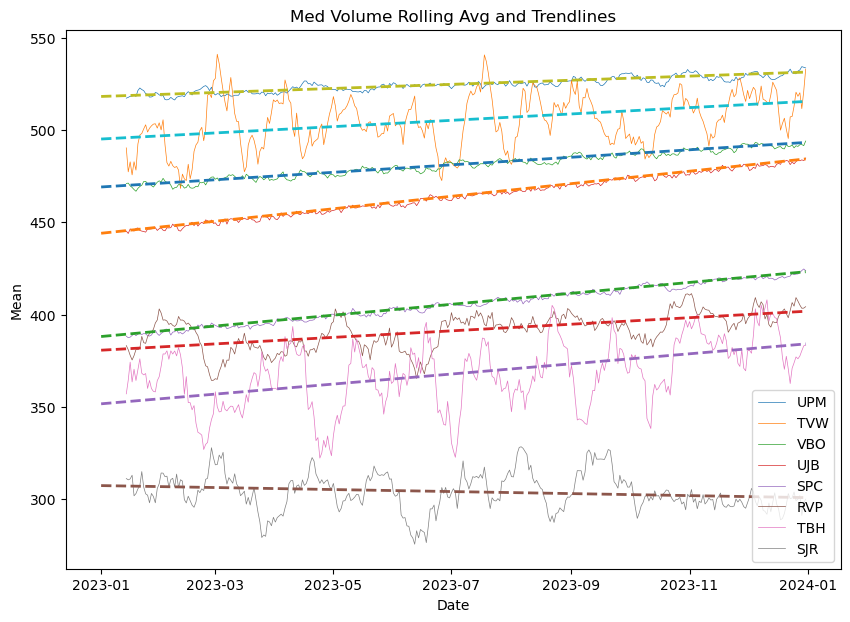

In [99]:
plt.figure(figsize=(10,7))
plt.title("Med Volume Rolling Avg and Trendlines")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[med_vol_index].rolling(window=14).mean(),lw=0.5)
plt.legend(med_vol_index)
for name in med_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=2)

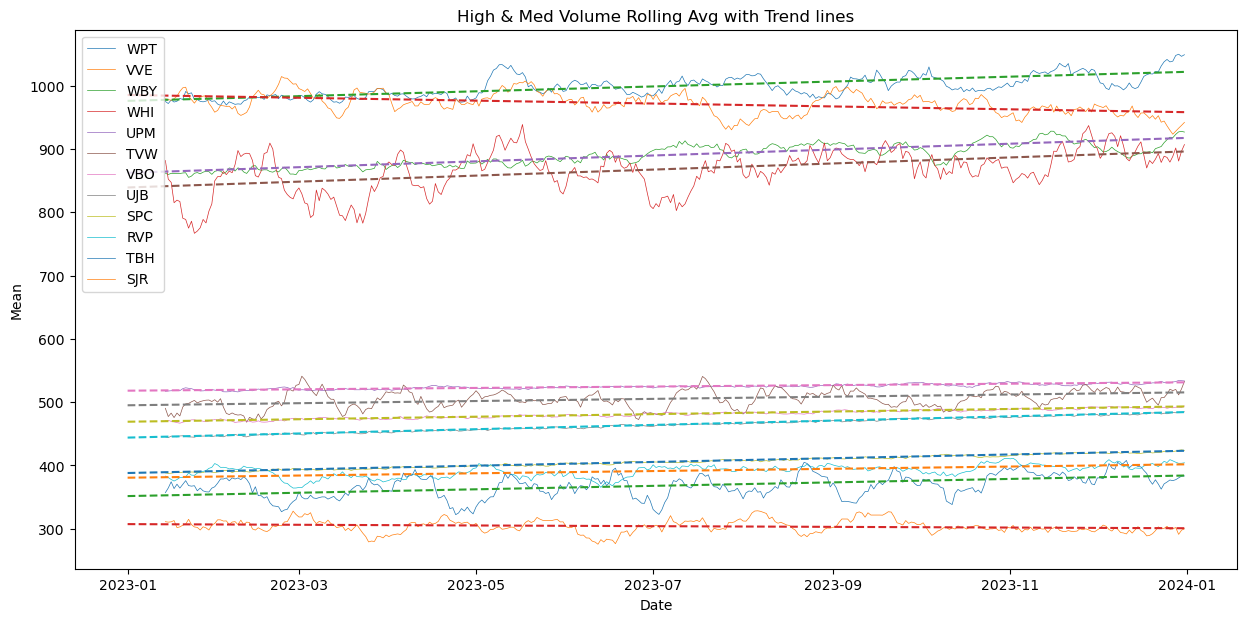

In [54]:
plt.figure(figsize=(15,7))
plt.title("High & Med Volume Rolling Avg with Trend lines")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[high_vol_index].rolling(window=14).mean(),lw=0.5)
plt.plot(sorted_store_customers[med_vol_index].rolling(window=14).mean(),lw=0.5)
plt.legend(high_vol_index.append(med_vol_index),loc='upper left')
for name in high_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=1.5)
for name in med_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=1.5)

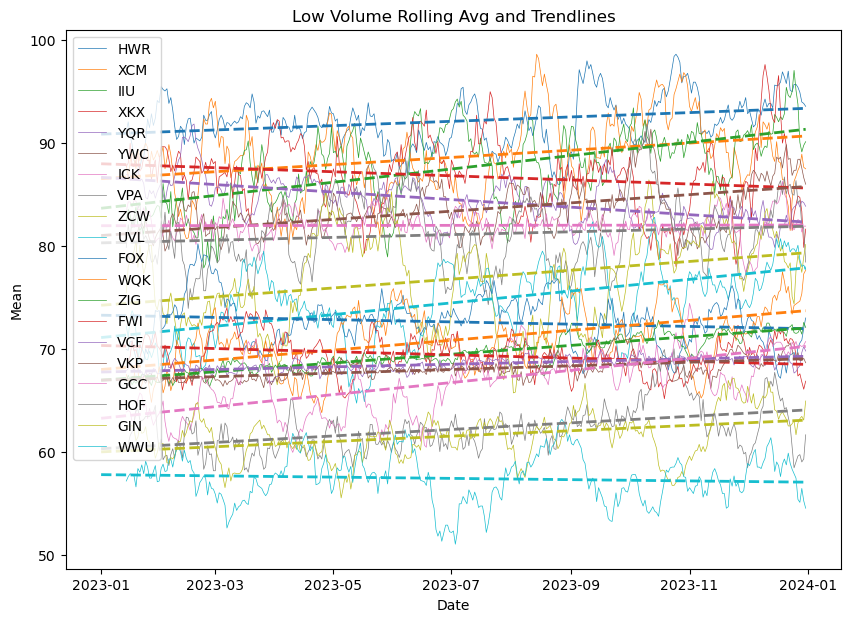

In [98]:
plt.figure(figsize=(10,7))
plt.title("Low Volume Rolling Avg and Trendlines")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[low_vol_index].rolling(window=14).mean(),lw=0.5)
plt.legend(low_vol_index)
for name in low_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=2)

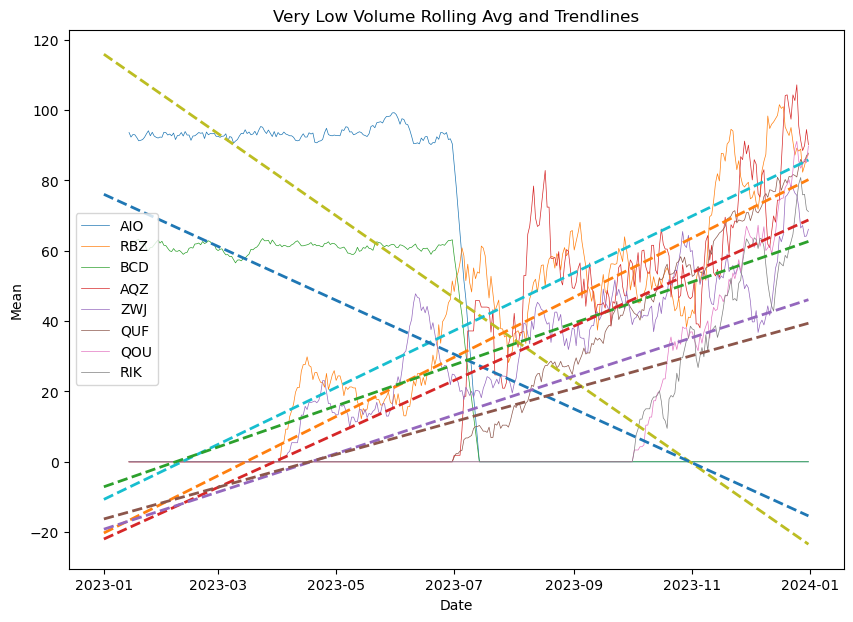

In [97]:
plt.figure(figsize=(10,7))
plt.title("Very Low Volume Rolling Avg and Trendlines")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.plot(sorted_store_customers[vlow_vol_index].rolling(window=14).mean(),lw=0.5)
plt.legend(vlow_vol_index)
for name in vlow_vol_index:
    x = np.arange(len(sorted_store_customers[name]))
    z = np.polyfit(x, sorted_store_customers[name], 1)
    trend = np.poly1d(z)
    plt.plot(sorted_store_customers.index, trend(x), linestyle='--',lw=2)

## Heat map between stores

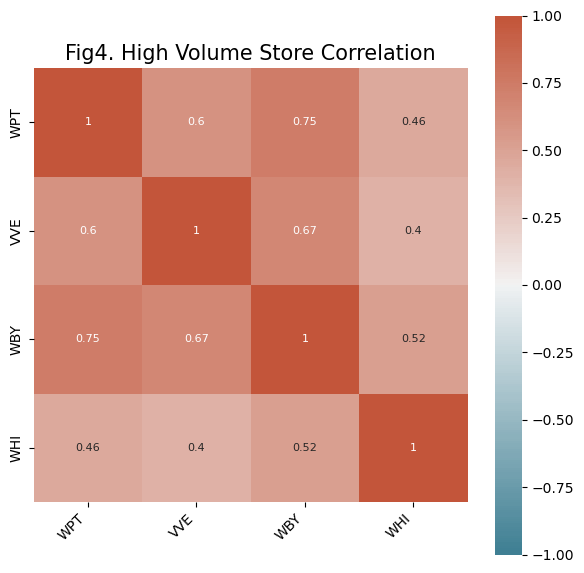

In [156]:
plt.figure(figsize=(7, 7))
corr = sorted_store_customers[high_vol_index].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Fig4. High Volume Store Correlation", fontsize= 15)
plt.show()

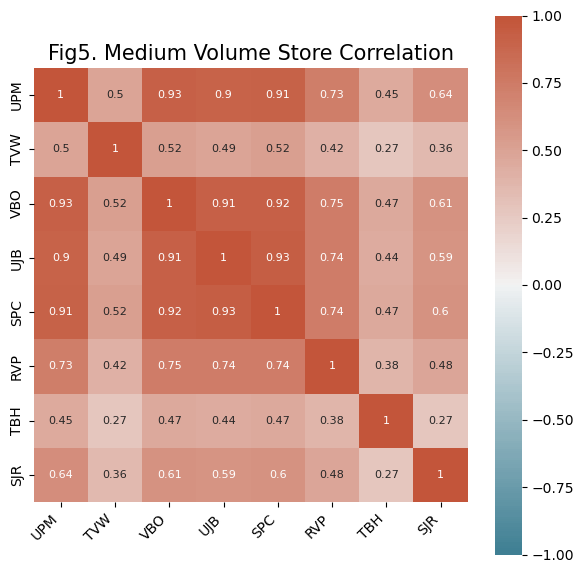

In [155]:
plt.figure(figsize=(7, 7))
corr = sorted_store_customers[med_vol_index].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Fig5. Medium Volume Store Correlation", fontsize= 15)
plt.show()

### Box Plots on the existing data

<Axes: title={'center': 'Fig3. High Volume Box Plot'}, xlabel='Stores', ylabel='Count'>

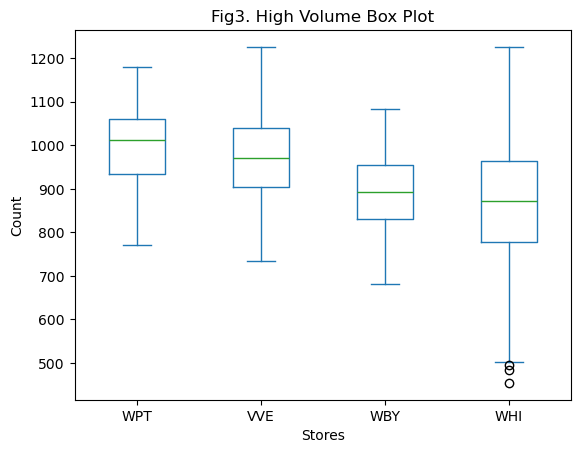

In [154]:
sorted_store_customers[high_vol_index].plot(kind="box",legend=True,xlabel="Stores",ylabel="Count",layout=(7,7),rot=0, title="Fig3. High Volume Box Plot")

<Axes: xlabel='Stores', ylabel='Count'>

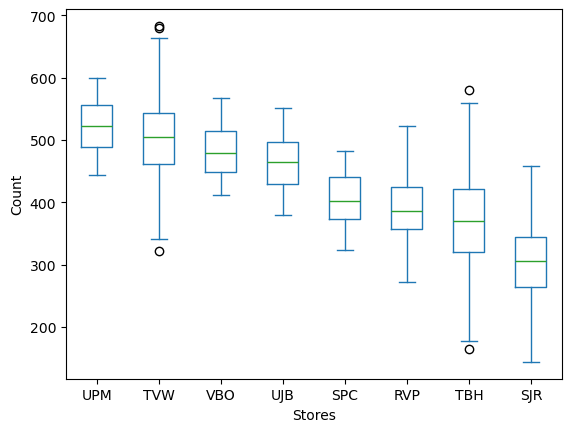

In [102]:
sorted_store_customers[med_vol_index].plot(kind="box",legend=True,xlabel="Stores",ylabel="Count",layout=(7,7),rot=0)

<Axes: xlabel='Stores', ylabel='Count'>

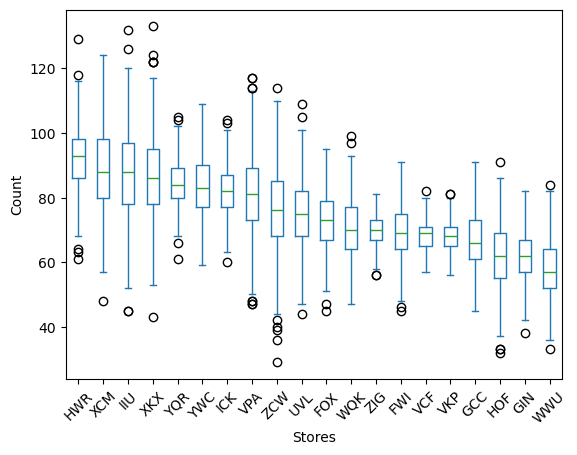

In [104]:
sorted_store_customers[low_vol_index].plot(kind="box",legend=True,xlabel="Stores",ylabel="Count",layout=(7,7),rot=45)

<Axes: xlabel='Stores', ylabel='Count'>

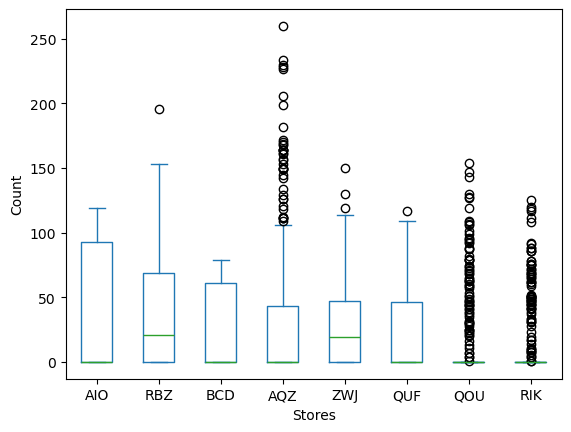

In [105]:
sorted_store_customers[vlow_vol_index].plot(kind="box",legend=True,xlabel="Stores",ylabel="Count",layout=(7,7),rot=0)

### Applying Scatter subplots to the various volumns

In [39]:
vlow_vol_index

Index(['AIO', 'RBZ', 'BCD', 'AQZ', 'ZWJ', 'QUF', 'QOU', 'RIK'], dtype='object')

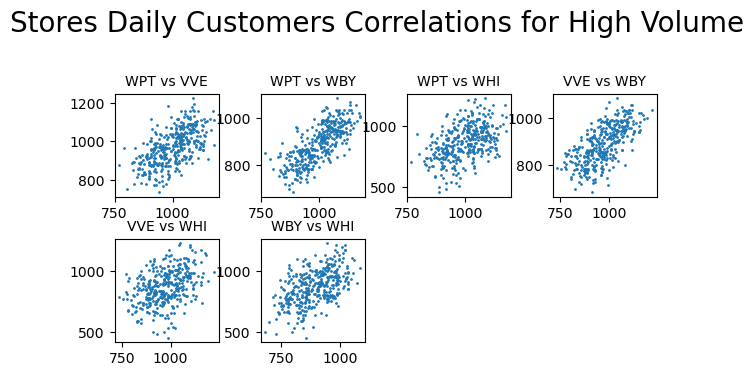

In [24]:
counter = 1
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Stores Daily Customers Correlations for High Volume', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i, name_i in enumerate(high_vol_index):
    for j in range(i + 1, len(high_vol_index)):
        name_j = high_vol_index[j]
        sub = fig.add_subplot(4, 4, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(sorted_store_customers[name_i], sorted_store_customers[name_j], s=1)
        counter += 1
plt.show()

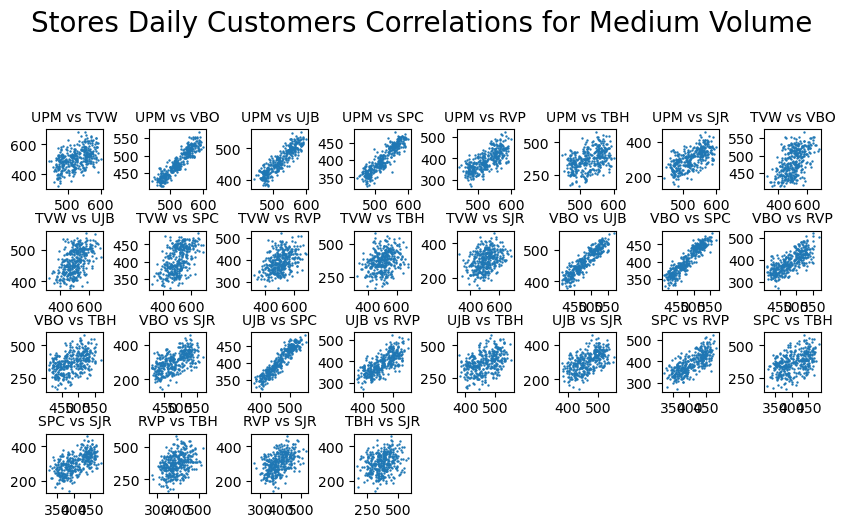

In [34]:
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Stores Daily Customers Correlations for Medium Volume', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=0.8, hspace=0.7)
for i, name_i in enumerate(med_vol_index):
    for j in range(i + 1, len(med_vol_index)):
        name_j = med_vol_index[j]
        sub = fig.add_subplot(8, 8, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(sorted_store_customers[name_i], sorted_store_customers[name_j], s=0.5)
        counter += 1
plt.show()

ValueError: num must be an integer with 1 <= num <= 64, not 65

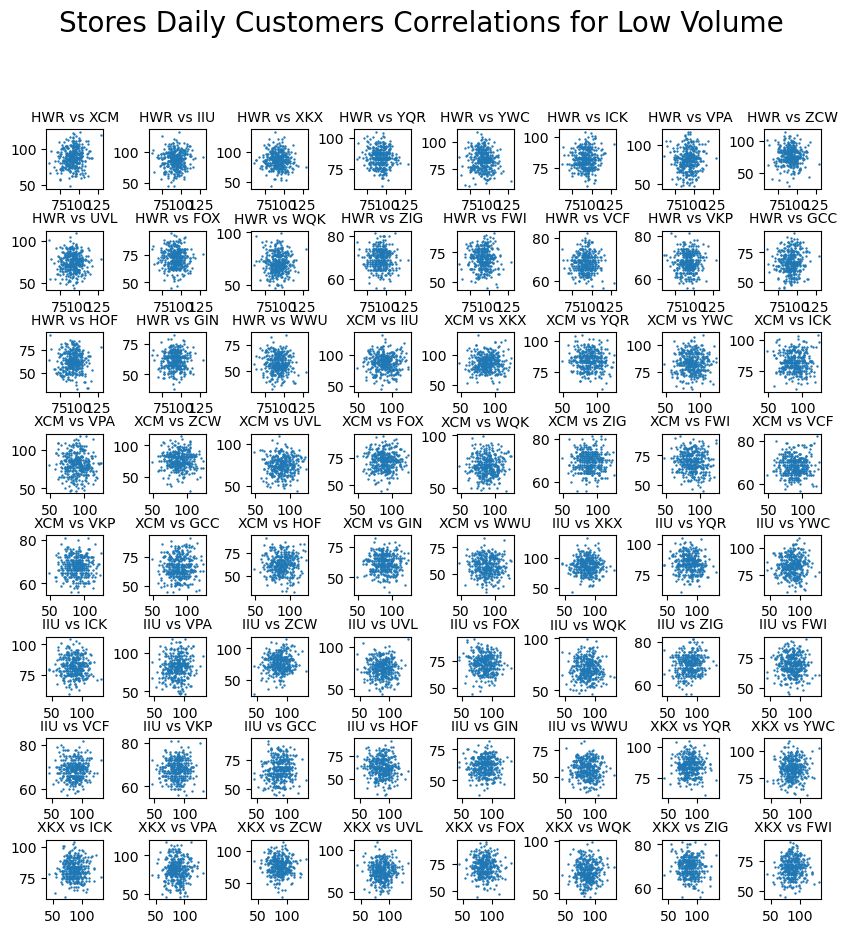

In [35]:
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Stores Daily Customers Correlations for Low Volume', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=0.8, hspace=0.7)
for i, name_i in enumerate(low_vol_index):
    for j in range(i + 1, len(low_vol_index)):
        name_j = low_vol_index[j]
        sub = fig.add_subplot(8, 8, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(sorted_store_customers[name_i], sorted_store_customers[name_j], s=0.5)
        counter += 1
plt.show()

#### Have to ignore or adjust the code, to split the shops equally or the number of low volume stores are high

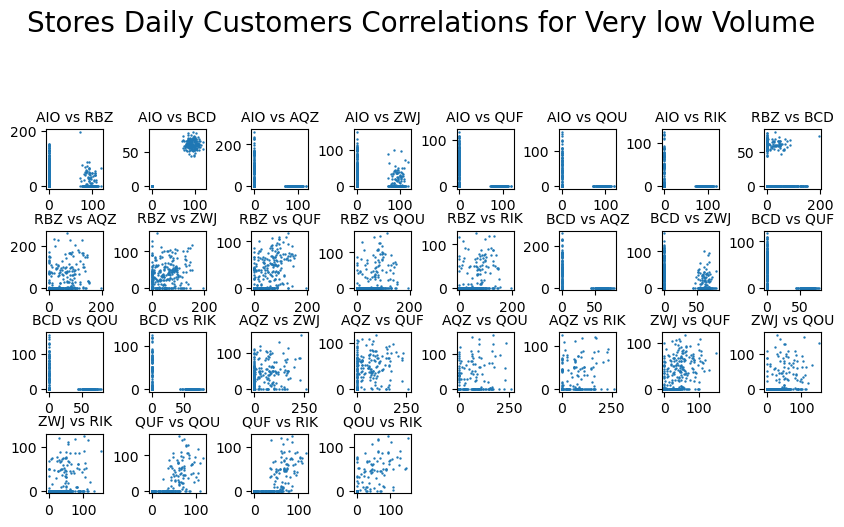

In [40]:
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Stores Daily Customers Correlations for Very low Volume', fontsize=20, position=(0.5, 1.0))
plt.subplots_adjust(wspace=0.8, hspace=0.7)
for i, name_i in enumerate(vlow_vol_index):
    for j in range(i + 1, len(vlow_vol_index)):
        name_j = vlow_vol_index[j]
        sub = fig.add_subplot(8, 8, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(sorted_store_customers[name_i], sorted_store_customers[name_j], s=0.5)
        counter += 1
plt.show()

In [16]:
store_data.head()

Marketing (£)  Overheads (£)  Staff  Size (msq)
Id                                                  
RBZ           2000          98000      2         210
VBO          21000          39000     23        3773
WHI          27000          95000     45        6534
QOU           1000          28000      1          71
WWU           2000          98000      2         204

In [17]:
sum_store_data = store_data.copy()

In [18]:
sum_store_data["Customers"] = sum_store_cust["Values"]
sum_store_data.sort_index

<bound method DataFrame.sort_index of      Marketing (£)  Overheads (£)  Staff  Size (msq)  Customers
Id                                                             
RBZ           2000          98000      2         210      13714
VBO          21000          39000     23        3773     175624
WHI          27000          95000     45        6534     316621
QOU           1000          28000      1          71       4915
WWU           2000          98000      2         204      20951
UPM          17000          52000     11        1227     191523
XCM           4000          72000      6         690      32346
VVE          30000          39000     24        3627     354622
RIK           1000          41000      1          63       4226
UJB          21000          71000      9        1876     169422
YWC           3000          43000      3         276      30439
GCC           2000          25000      4         510      24360
WPT          40000          81000     17        3482     364531
RV

In [19]:
sorted_store_customers.head()

WPT   VVE   WBY   WHI  UPM  TVW  VBO  UJB  SPC  RVP  ...  GIN  \
Date                                                              ...        
2023-01-01  1082  1177  1013  1146  554  679  512  504  449  432  ...   67   
2023-01-02  1014  1017   892   967  544  561  505  456  430  450  ...   61   
2023-01-03   951   966   783  1020  514  512  457  434  368  341  ...   54   
2023-01-04   953   820   777   668  472  322  440  410  335  329  ...   61   
2023-01-05   803   752   780   767  486  466  436  385  352  335  ...   72   

            WWU  AIO  RBZ  BCD  AQZ  ZWJ  QUF  QOU  RIK  
Date                                                     
2023-01-01   50  103    0   63    0    0    0    0    0  
2023-01-02   59   85    0   51    0    0    0    0    0  
2023-01-03   66  104    0   62    0    0    0    0    0  
2023-01-04   47   94    0   58    0    0    0    0    0  
2023-01-05   77  100    0   61    0    0    0    0    0  

[5 rows x 40 columns]

In [20]:
import seaborn as sns

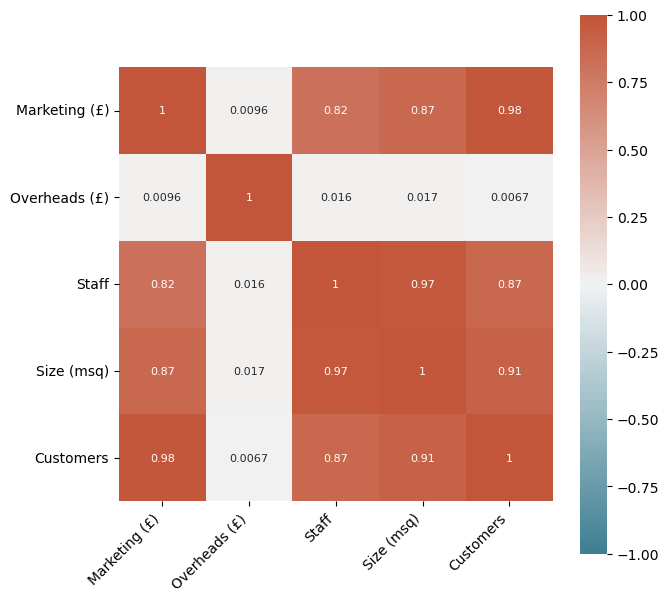

In [21]:
plt.figure(figsize=(7, 7))
corr = sum_store_data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

### Histogram on the data

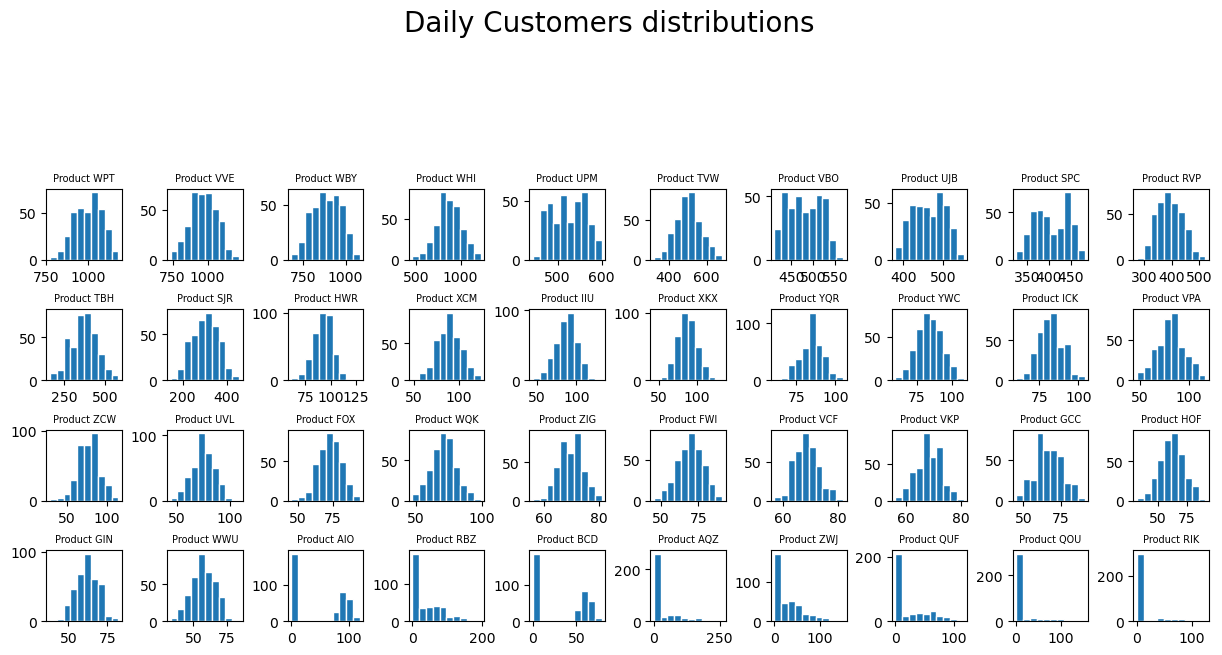

In [28]:
counter = 1
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Daily Customers distributions', fontsize=20, position=(0.5, 1.0))
for name in sorted_store_customers:
    sub = fig.add_subplot(10, 10, counter)
    sub.set_title('Product ' + name, fontsize=7)
    sub.hist(sorted_store_customers[name], edgecolor='w')
    counter += 1
plt.subplots_adjust(wspace=0.6, hspace=0.7)
plt.show()

### High Volume Hist

40 bins


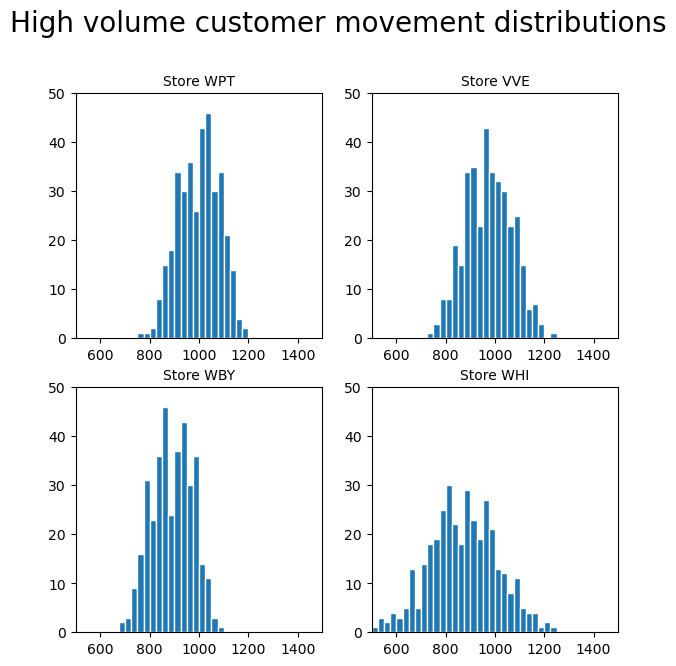

In [35]:
x_min = 500
x_max = 1500
bin_width = 25

n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]

fig = plt.figure(figsize=(7, 7))
fig.suptitle('High volume customer movement distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in high_vol_index:
    sub = fig.add_subplot(2, 2, counter)
    sub.hist(sorted_store_customers[name], bins, edgecolor='w')
    sub.set_title('Store ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=50)
    counter += 1
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Medium volume Hist

18 bins


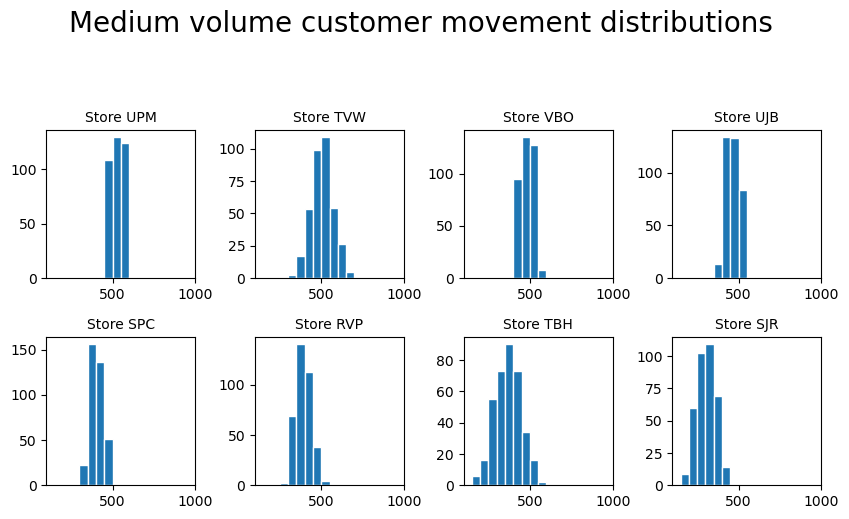

In [92]:
x_min = 100
x_max = 1000
bin_width = 50

n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Medium volume customer movement distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in med_vol_index:
    sub = fig.add_subplot(4, 4, counter)
    sub.hist(sorted_store_customers[name], bins, edgecolor='w')
    sub.set_title('Store ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0)
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Low volume Hist

11 bins


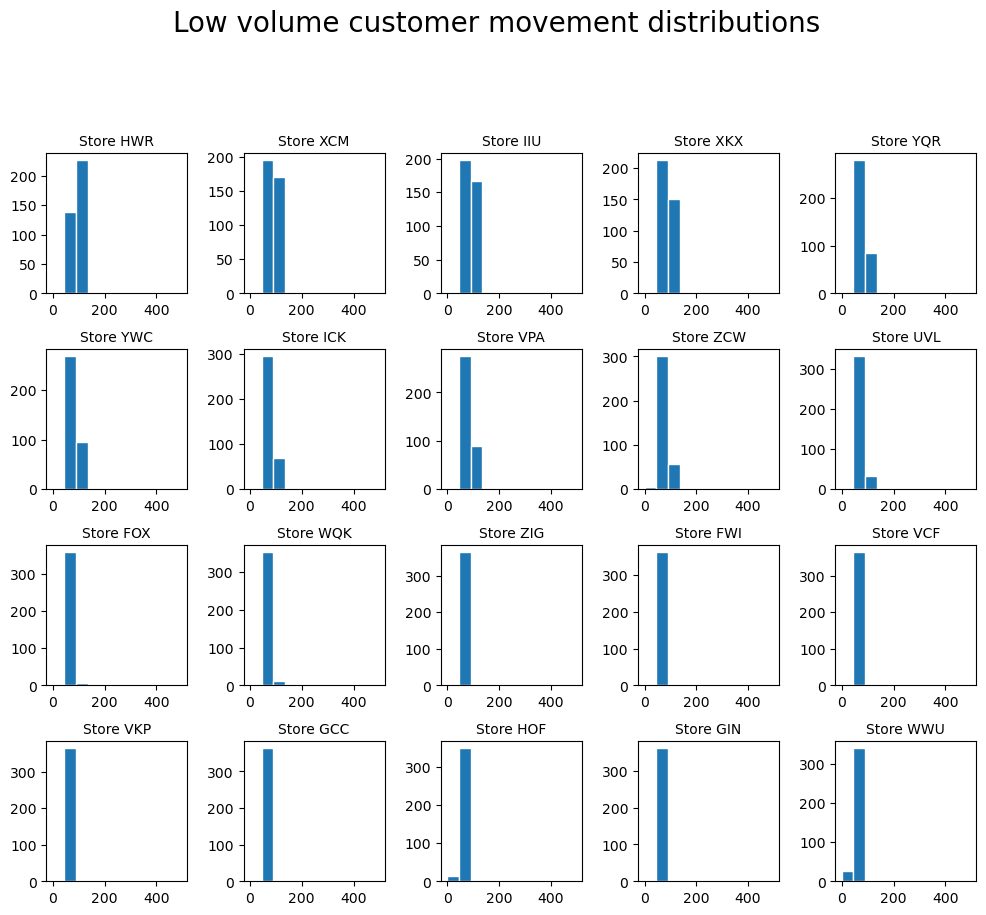

In [29]:
x_min = 0
x_max = 500
bin_width = 45

n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Low volume customer movement distributions', fontsize=20, position=(0.5, 1.0))
counter = 1
for name in low_vol_index:
    sub = fig.add_subplot(5, 5, counter)
    sub.hist(sorted_store_customers[name], bins, edgecolor='w')
    sub.set_title('Store ' + name, fontsize=10)
    #sub.set_xlim(xmin=x_min, xmax=x_max)
    #sub.set_ylim(ymin=0)
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Line Plot for seasonal variation

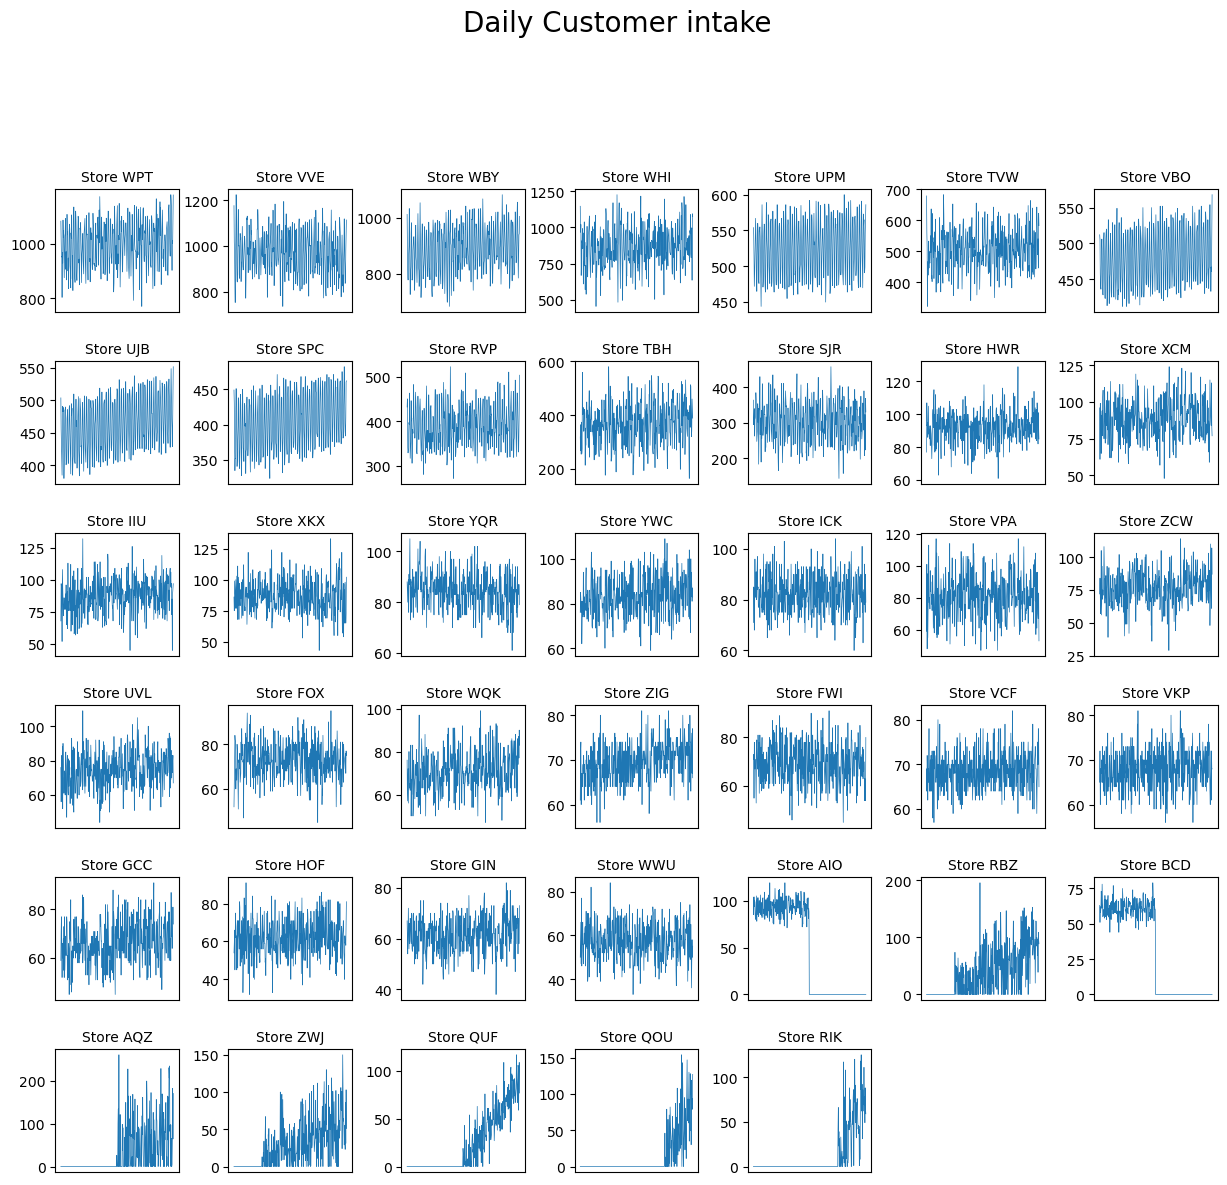

In [100]:
counter = 1
fig = plt.figure(figsize=(15, 15))
fig.suptitle('Daily Customer intake', fontsize=20, position=(0.5, 1.0))
for name in sorted_store_customers.columns:
    sub = fig.add_subplot(7, 7, counter)
    sub.set_title('Store ' + name, fontsize=10)
    sub.plot(sorted_store_customers.index, sorted_store_customers[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

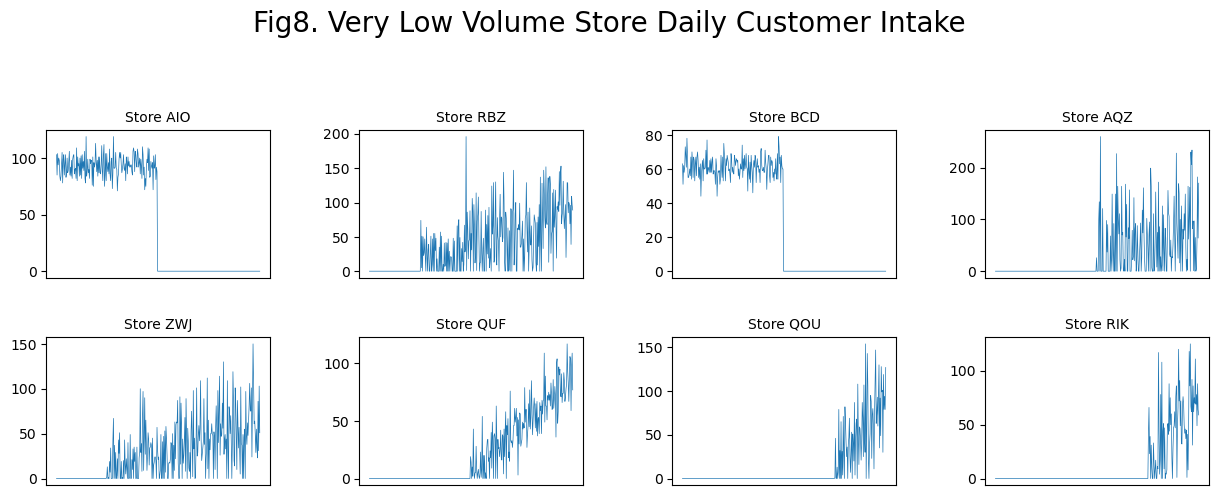

In [160]:
counter = 1
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Fig8. Very Low Volume Store Daily Customer Intake', fontsize=20, position=(0.5, 1.0))
for name in sorted_store_customers[vlow_vol_index]:
    sub = fig.add_subplot(4, 4, counter)
    sub.set_title('Store ' + name, fontsize=10)
    sub.plot(sorted_store_customers.index, sorted_store_customers[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## Autocorrelation Plots

### High Volume Plots

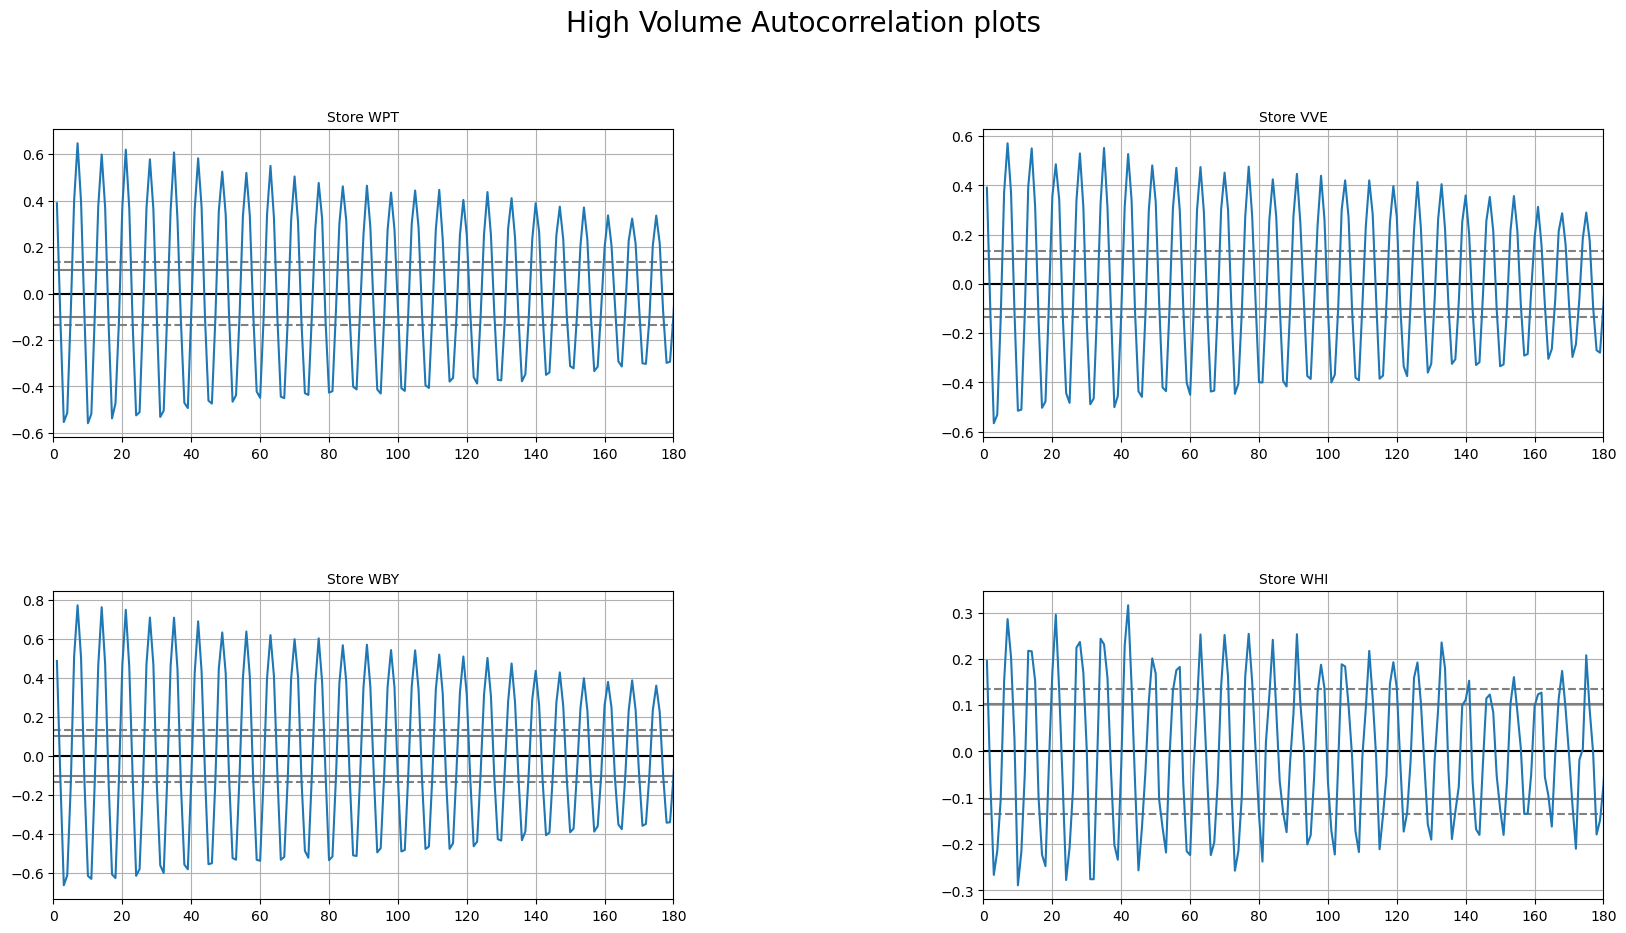

In [20]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=2)
fig.suptitle('High Volume Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in high_vol_index:
    sub = pd.plotting.autocorrelation_plot(sorted_store_customers[name], axes[row, col])
    sub.set_title('Store ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    sub.set_xlim(xmin=0, xmax=180)
    col += 1
    if col == 2:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Medium Size stores

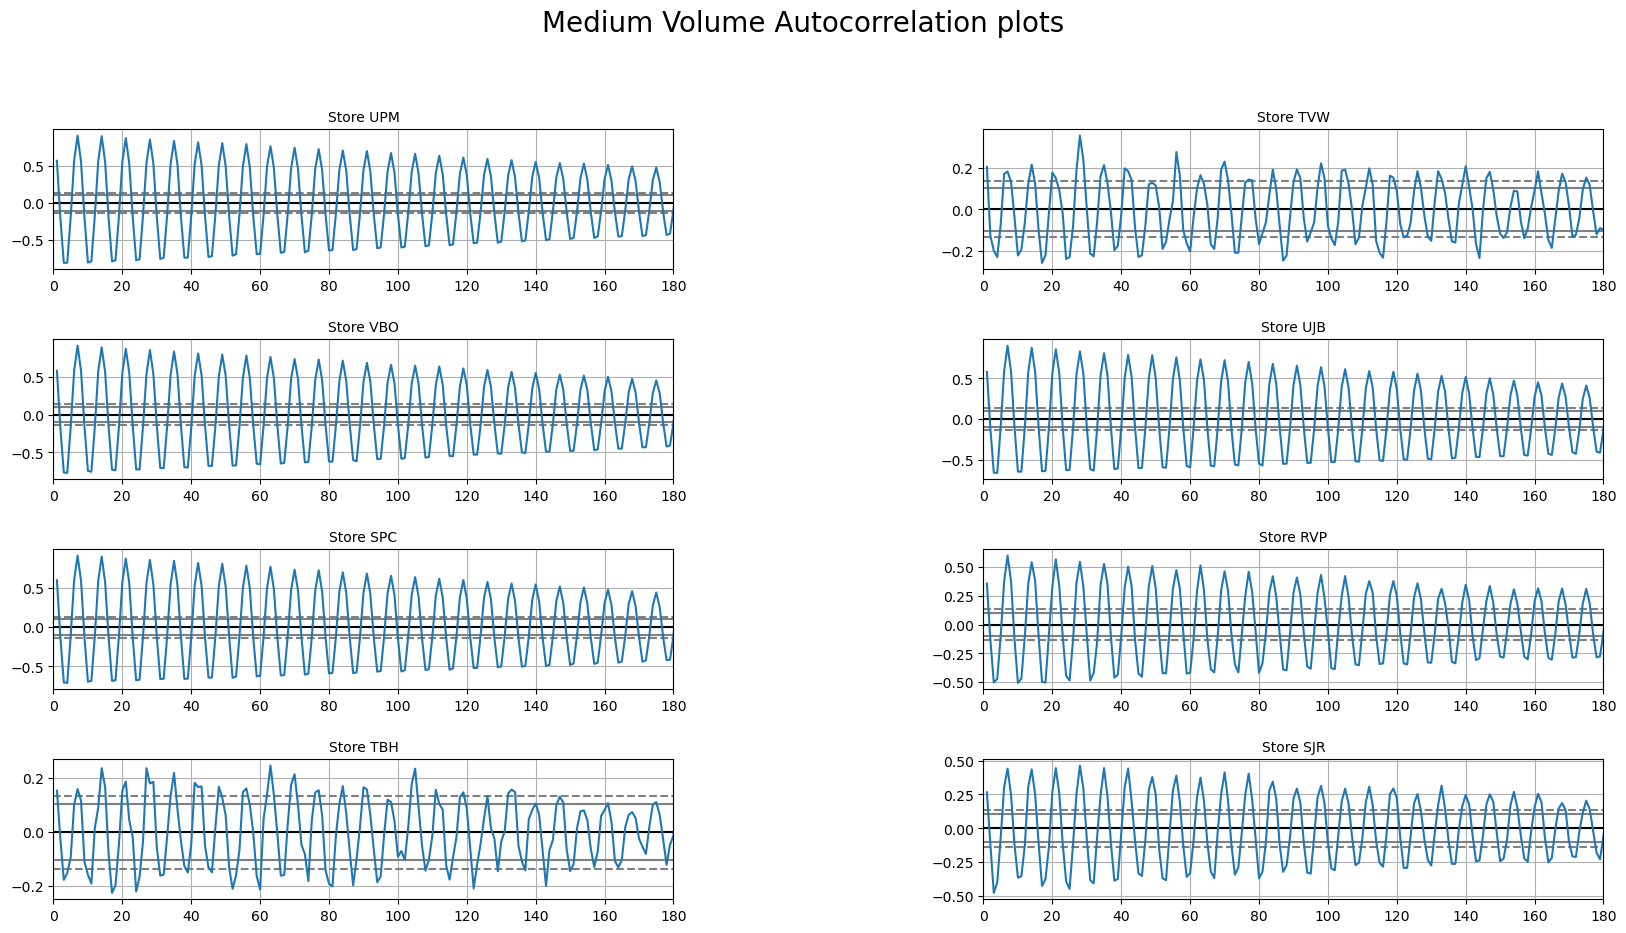

In [22]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(20, 10), nrows=4, ncols=2)
fig.suptitle('Medium Volume Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in med_vol_index:
    sub = pd.plotting.autocorrelation_plot(sorted_store_customers[name], axes[row, col])
    sub.set_title('Store ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    sub.set_xlim(xmin=0, xmax=180)
    col += 1
    if col == 2:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### Low Vol Plots

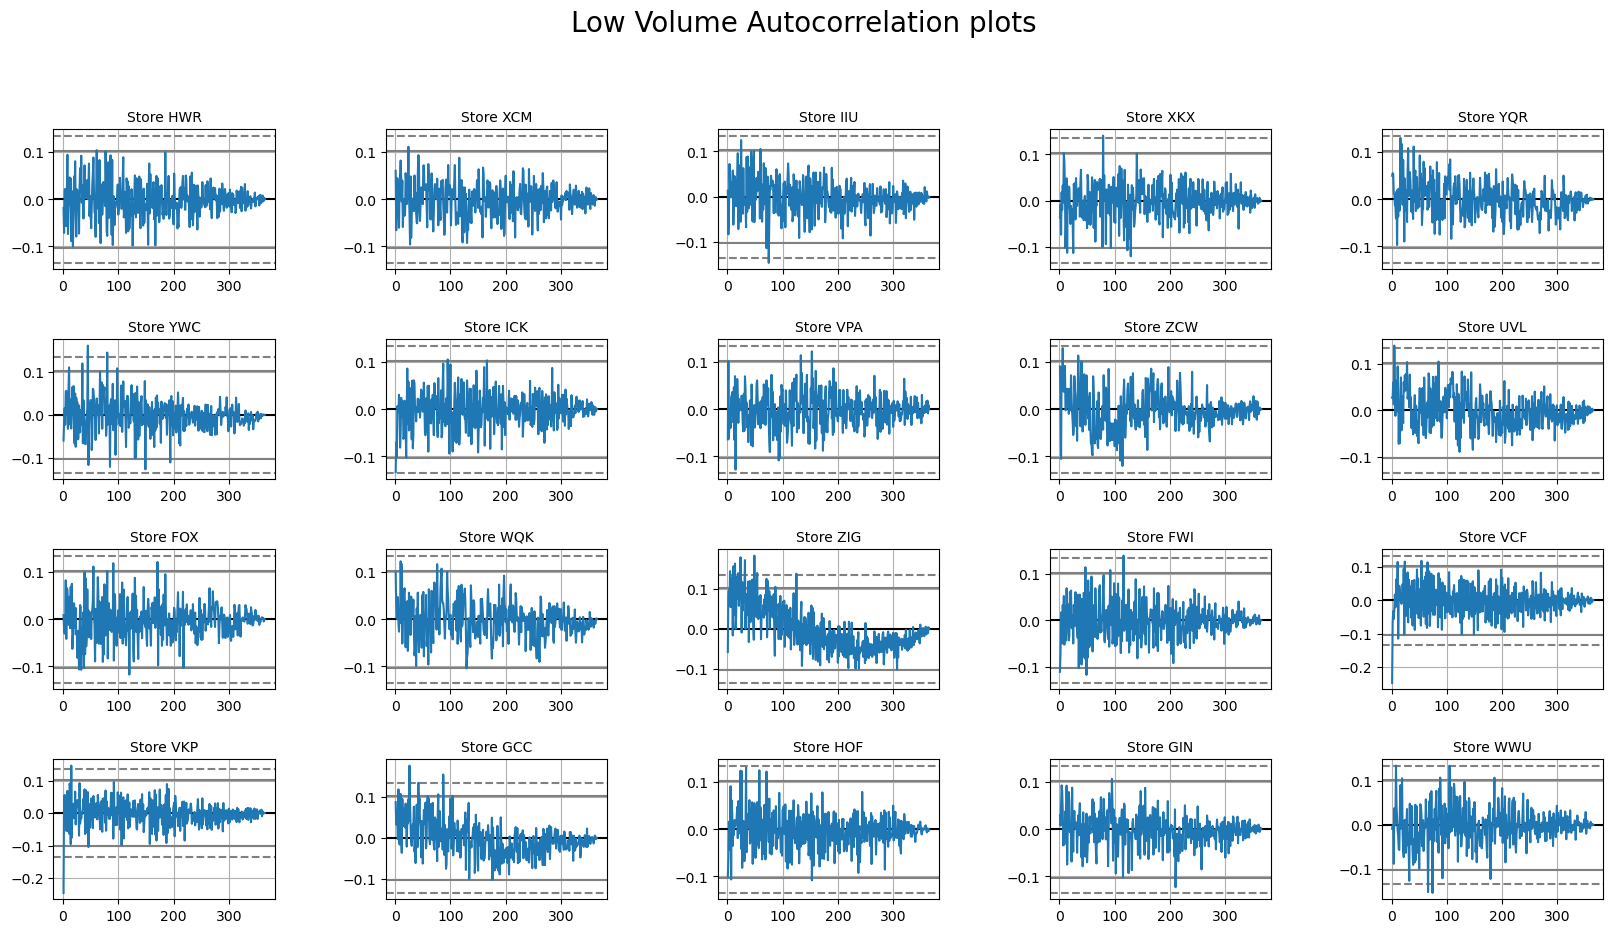

In [113]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(20, 10), nrows=4, ncols=5)
fig.suptitle('Low Volume Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in low_vol_index:
    sub = pd.plotting.autocorrelation_plot(sorted_store_customers[name], axes[row, col])
    sub.set_title('Store ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 5:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### VLOW Vol Plots

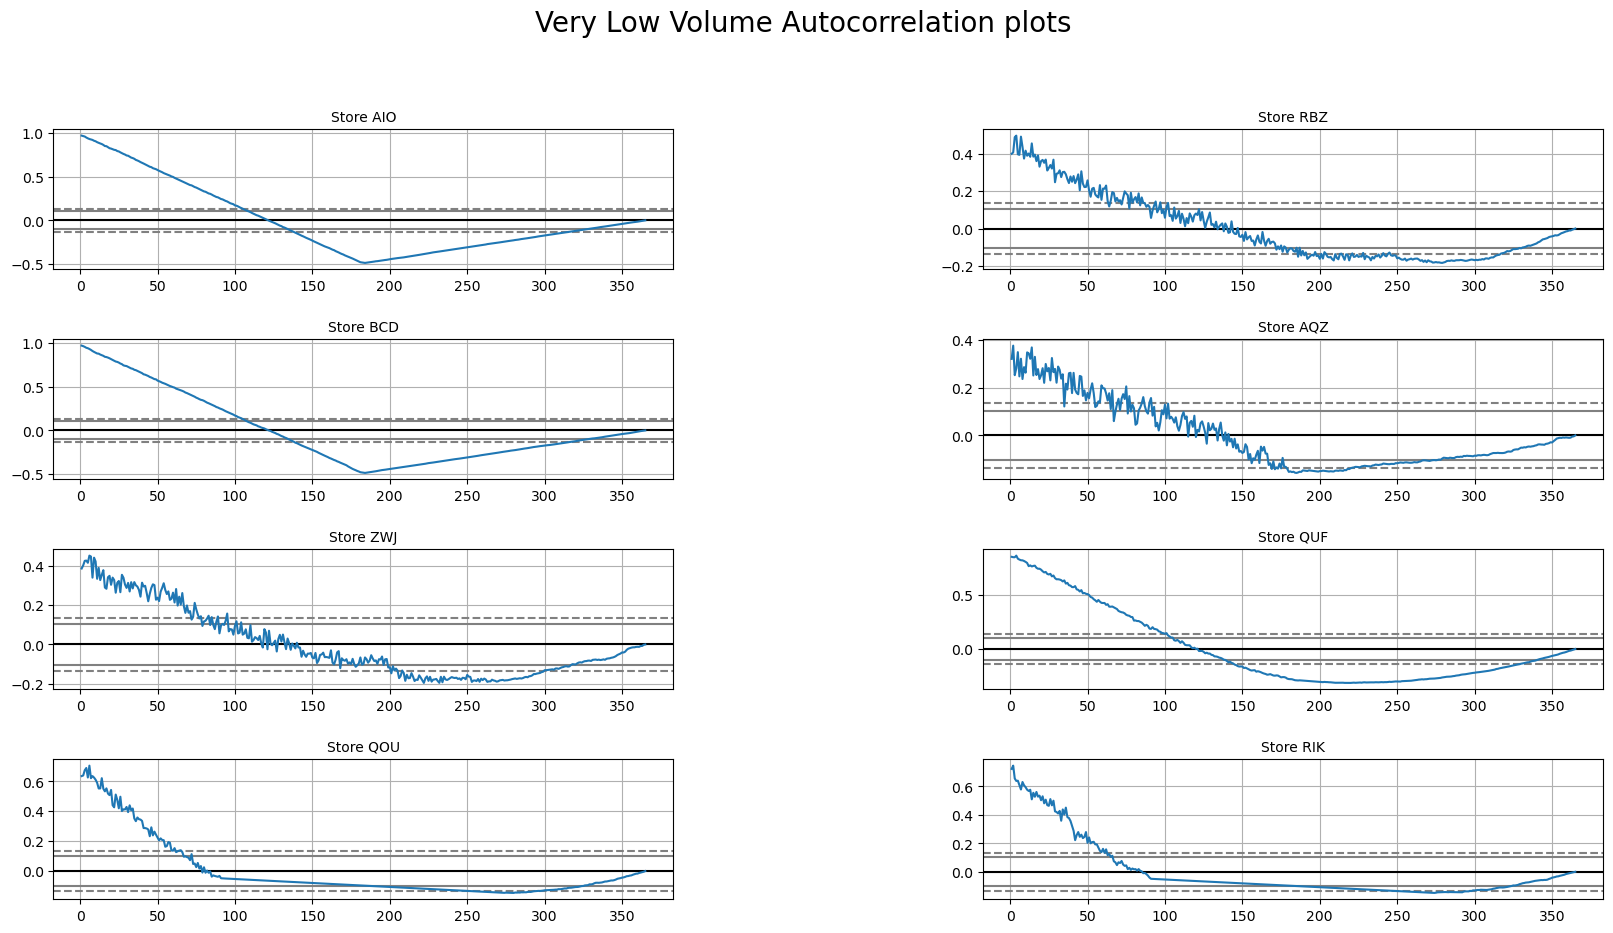

In [115]:
row = 0
col = 0
fig, axes = plt.subplots(figsize=(20, 10), nrows=4, ncols=2)
fig.suptitle('Very Low Volume Autocorrelation plots', fontsize=20, position=(0.5, 1.0))
for name in vlow_vol_index:
    sub = pd.plotting.autocorrelation_plot(sorted_store_customers[name], axes[row, col])
    sub.set_title('Store ' + name, fontsize=10)
    sub.xaxis.label.set_visible(False)
    sub.yaxis.label.set_visible(False)
    col += 1
    if col == 2:
        row += 1
        col = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## Dimentionality

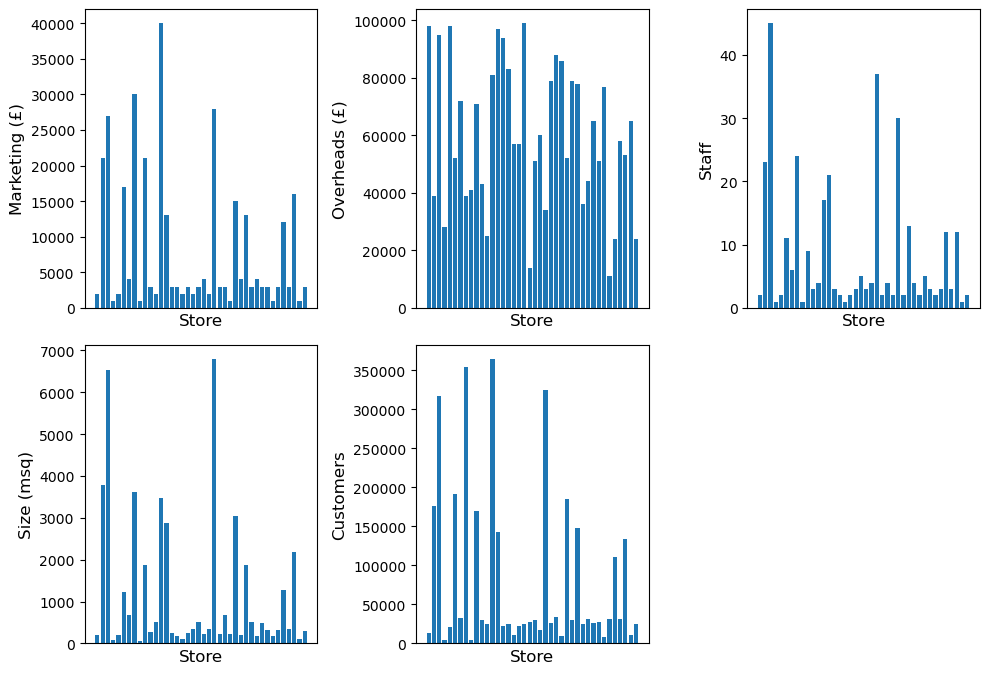

In [37]:
plt.figure(figsize=(10, 10))
counter = 1
x_pos = np.arange(len(sum_store_data.index))
for attribute in sum_store_data:
    sub = plt.subplot(3, 3, counter)
    sub.bar(x_pos, sum_store_data[attribute], align='center')
    sub.axes.get_xaxis().set_ticks([])
    #sub.set_xticks(x_pos)
    #sub.set_xticklabels(sum_store_data.index)
    sub.set_xlabel('Store', fontsize=12)
    sub.set_ylabel(attribute, fontsize=12)
    counter += 1
plt.tight_layout()
plt.show()

In [21]:
high_vol_index

sum_store_data.loc[high_vol_index]

normalized_data = sum_store_data / sum_store_data.max()
normalized_data.head()

Marketing (£)  Overheads (£)     Staff  Size (msq)  Customers
Id                                                                
RBZ          0.050       0.989899  0.044444    0.030901   0.037621
VBO          0.525       0.393939  0.511111    0.555180   0.481781
WHI          0.675       0.959596  1.000000    0.961448   0.868571
QOU          0.025       0.282828  0.022222    0.010447   0.013483
WWU          0.050       0.989899  0.044444    0.030018   0.057474

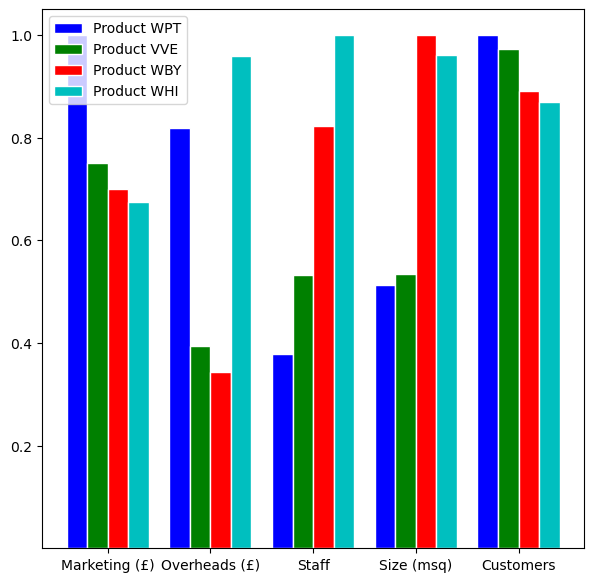

In [43]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10, 10))
c = 0
n_bars = len(high_vol_index)
x_pos_base = np.arange(len(sum_store_data.columns))
bar_width = 0.8 / n_bars
for name in high_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Product ' + name)
    c += 1
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, sum_store_data.columns)
plt.legend()
plt.show()

#### Medium vol stores bar chart

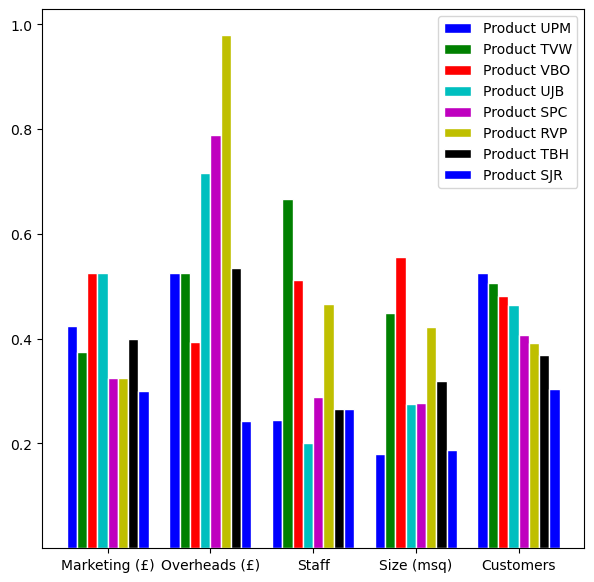

In [44]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(7, 7))
c = 0
n_bars = len(med_vol_index)
x_pos_base = np.arange(len(sum_store_data.columns))
bar_width = 0.8 / n_bars
for name in med_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    x_pos = [x + (bar_width * c) for x in x_pos_base]
    plt.bar(x_pos, values, color=colours[c % len(colours)],
            width=bar_width, edgecolor='white', label='Product ' + name)
    c += 1
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
x_pos = [x + (bar_width * (c - 1) / 2) for x in x_pos_base]
plt.xticks(x_pos, sum_store_data.columns)
plt.legend()
plt.show()

In [138]:
sum_store_data.head()

Marketing (£)  Overheads (£)  Staff  Size (msq)  Customers
Id                                                             
RBZ           2000          98000      2         210      13714
VBO          21000          39000     23        3773     175624
WHI          27000          95000     45        6534     316621
QOU           1000          28000      1          71       4915
WWU           2000          98000      2         204      20951

In [151]:
normalized_data.loc[med_vol_index]

Marketing (£)  Overheads (£)     Staff  Size (msq)  Customers
UPM          0.425       0.525253  0.244444    0.180547   0.525396
TVW          0.375       0.525253  0.666667    0.449382   0.505902
VBO          0.525       0.393939  0.511111    0.555180   0.481781
UJB          0.525       0.717172  0.200000    0.276045   0.464767
SPC          0.325       0.787879  0.288889    0.277222   0.406185
RVP          0.325       0.979798  0.466667    0.423190   0.391755
TBH          0.400       0.535354  0.266667    0.319894   0.368375
SJR          0.300       0.242424  0.266667    0.187905   0.304537

In [157]:
volume_groups = {
    'High': high_vol_index,
    'Medium': med_vol_index,
    'Low': low_vol_index,
    'Very Low': vlow_vol_index
}

group_colors = ['b', 'g', 'r', 'c']
group_means = {}


for i, (group, stores) in enumerate(volume_groups.items()):
    group_means[group] = normalized_data.loc[stores].mean()

group_means_df = pd.DataFrame(group_means).T 
group_means_df.index.name = 'Volume'
group_means_df = group_means_df.reset_index()


melted = group_means_df.melt(id_vars='Volume', var_name='Metric', value_name='Value')


melted.hvplot.bar(x='Metric', y='Value', by='Volume', title='Fig6. Interactive Comparison of Normalized Store Metrics by Volume Group',
    xlabel='Metric', ylabel='Normalized Value', rot=45, height=600, width=1000)




:Bars   [Metric,Volume]   (Value)

#### Radar plots for High and Medium

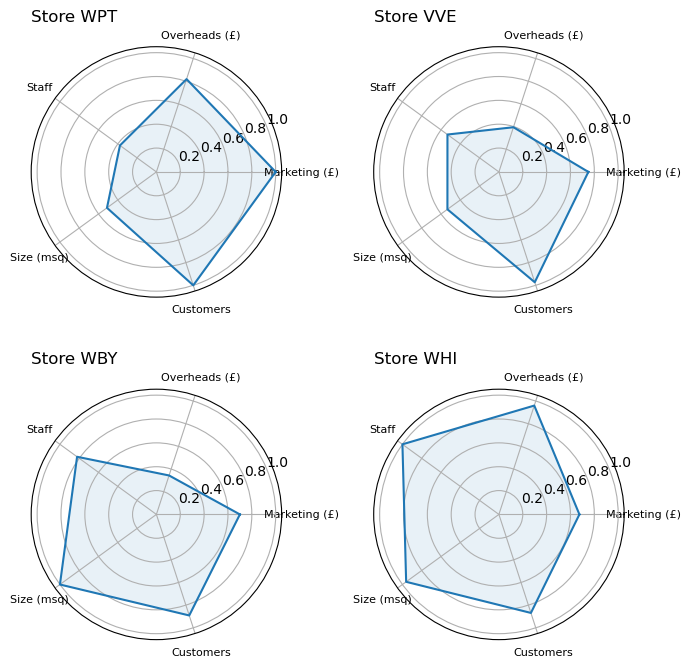

In [46]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(7, 7))
counter = 1
for name in high_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalized_data.columns, fontsize=8)
    sub.set_title('Store ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

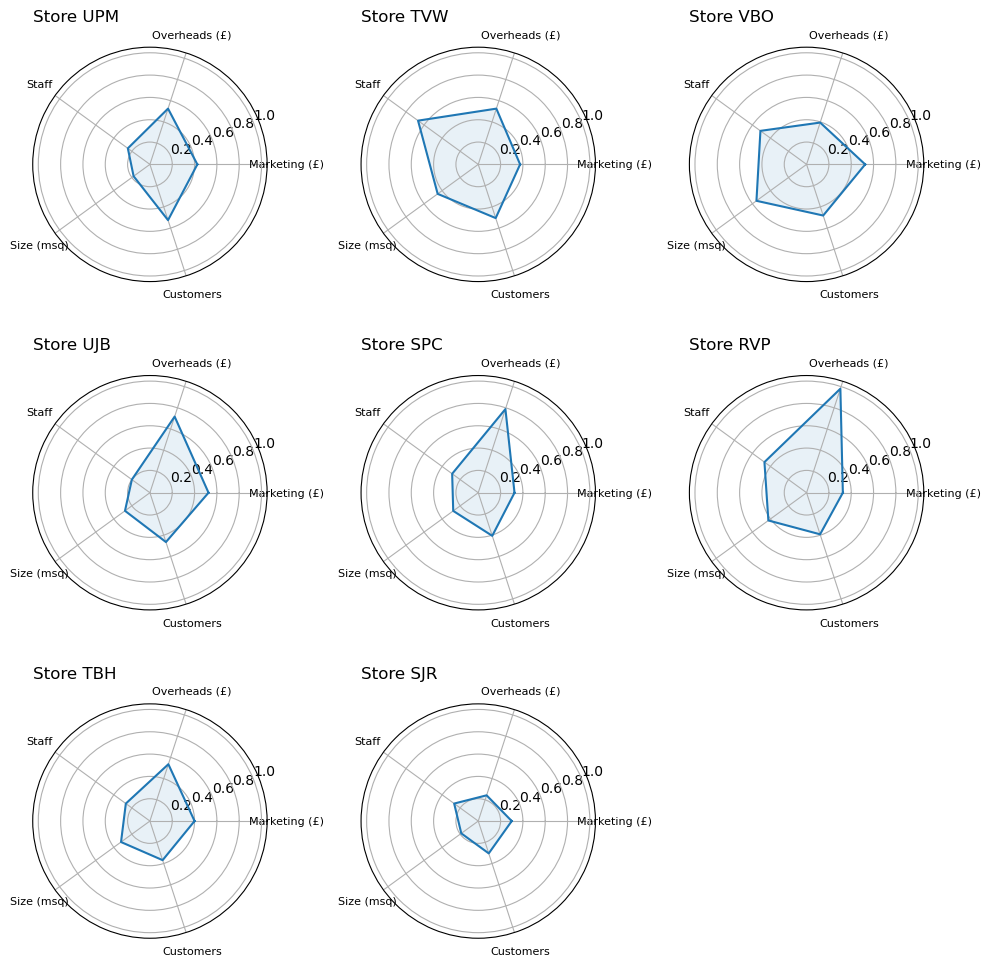

In [49]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(10, 10))
counter = 1
for name in med_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalized_data.columns, fontsize=8)
    sub.set_title('Store ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

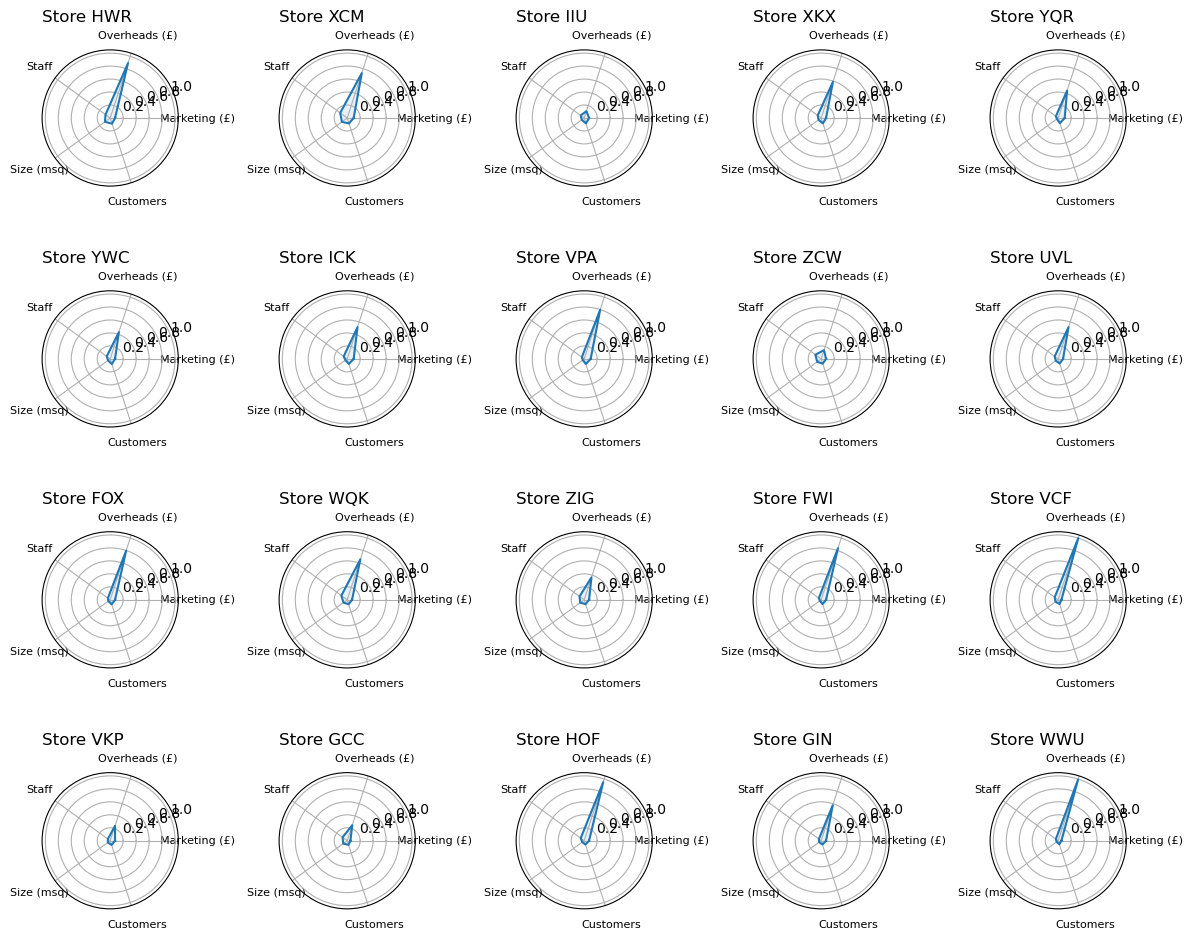

In [57]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(12, 12))
counter = 1
for name in low_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(5, 5, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalized_data.columns, fontsize=8)
    sub.set_title('Store ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

## Ovarlaid Radar Plots High and Medium

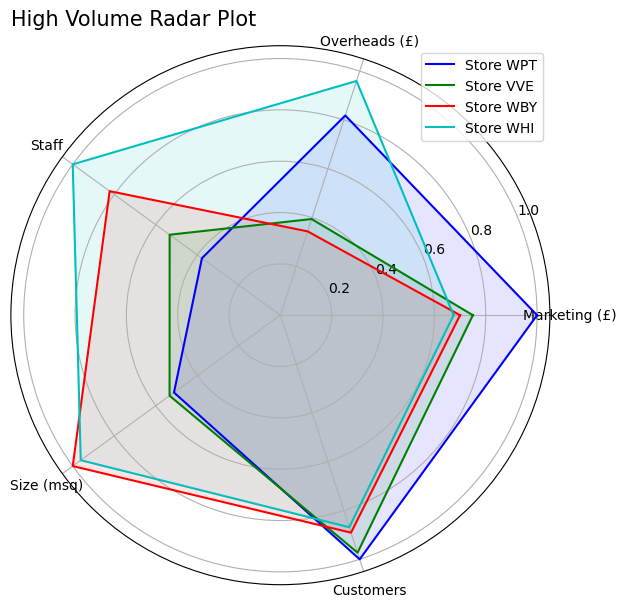

In [53]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(7, 7))
sub = plt.subplot(1, 1, 1, polar=True)
for name in high_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Store ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalized_data.columns)
    sub.set_title("High Volume Radar Plot", fontsize= 15, loc="left")
    c += 1
plt.legend(loc=1)
plt.show()

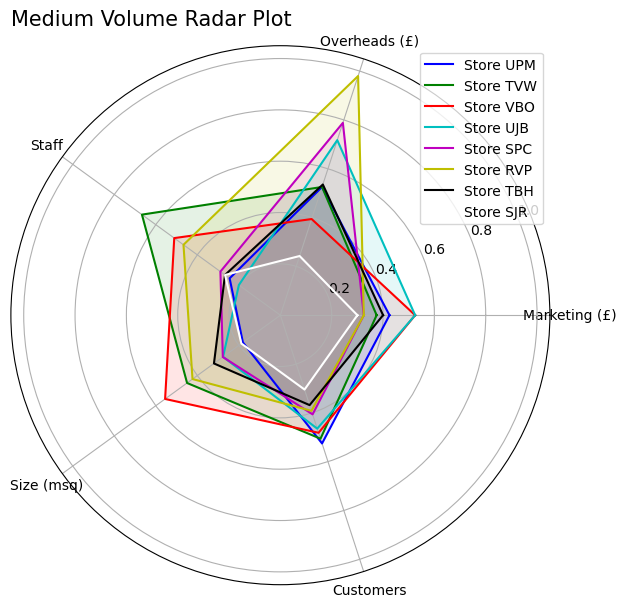

In [60]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
c = 0
plt.figure(figsize=(7, 7))
sub = plt.subplot(1, 1, 1, polar=True)
for name in med_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub.plot(angles, values, colours[c % len(colours)], label='Store ' + name)
    sub.fill(angles, values, colours[c % len(colours)], alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalized_data.columns)
    sub.set_title("Medium Volume Radar Plot", fontsize= 15, loc="left")
    c += 1
plt.legend(loc=1)
plt.show()

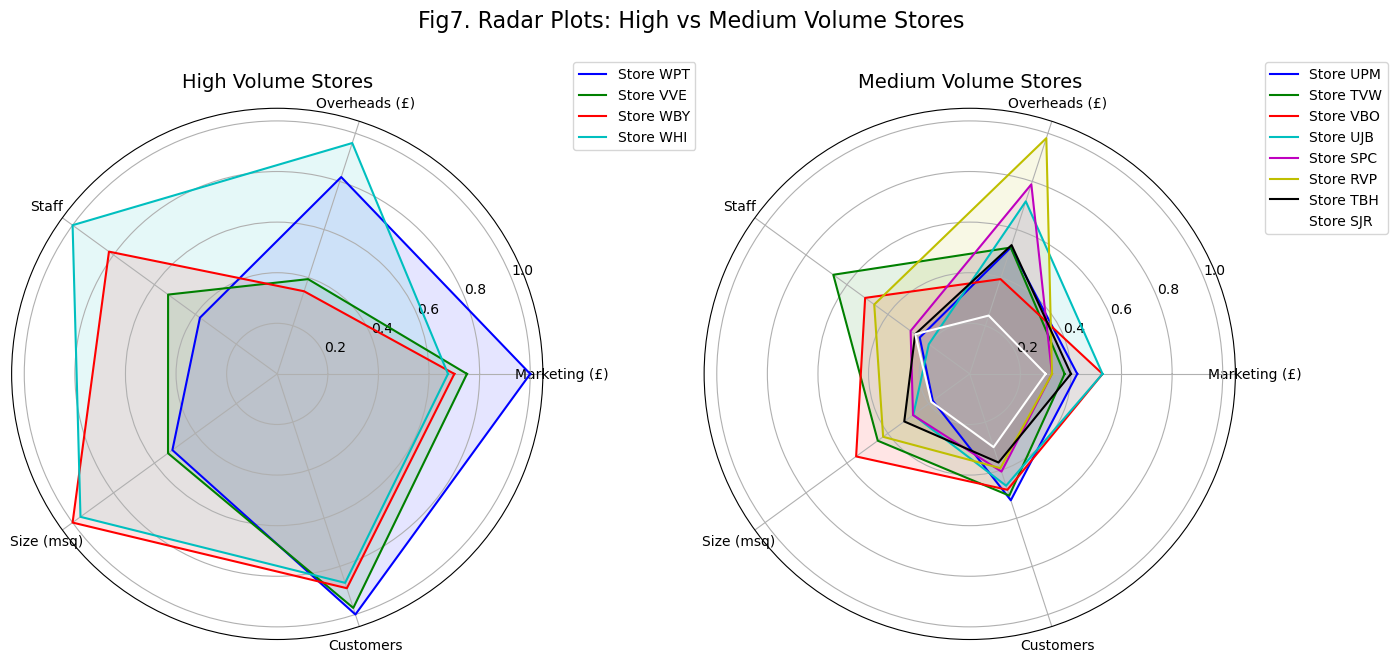

In [158]:
n_attributes = len(normalized_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, axs = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(polar=True))
fig.suptitle("Fig7. Radar Plots: High vs Medium Volume Stores", fontsize=16)

# Plot High Volume stores
c = 0
for name in high_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    axs[0].plot(angles, values, colours[c % len(colours)], label='Store ' + name)
    axs[0].fill(angles, values, colours[c % len(colours)], alpha=0.1)
    c += 1
axs[0].set_title("High Volume Stores", fontsize=14)
axs[0].set_ylim(0, 1.05)
axs[0].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
axs[0].set_xticks(angles[:-1])
axs[0].set_xticklabels(normalized_data.columns)
axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Plot Medium Volume stores
c = 0
for name in med_vol_index:
    values = normalized_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    axs[1].plot(angles, values, colours[c % len(colours)], label='Store ' + name)
    axs[1].fill(angles, values, colours[c % len(colours)], alpha=0.1)
    c += 1
axs[1].set_title("Medium Volume Stores", fontsize=14)
axs[1].set_ylim(0, 1.05)
axs[1].set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
axs[1].set_xticks(angles[:-1])
axs[1].set_xticklabels(normalized_data.columns)
axs[1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


### Creating Interactive line plots using HVPlot

In [84]:
import hvplot.pandas
import panel as pn

In [111]:
plot = sorted_store_customers.loc[:,high_vol_index].hvplot.(
    frame_height=300, frame_width=600,
    xlabel='Dates', ylabel='Customers')
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(NdOverlay, sizing_mode='fixed')

In [121]:
plot = (sorted_store_customers[[high_vol_index, med_vol_index]].rolling(window=14).mean()).hvplot.line(frame_height=300, frame_width=600,
    xlabel='Dates', ylabel='Customers')
#hvplot.show(plot)

pane = pn.panel(plot)
pane

TypeError: unhashable type: 'Index'

In [72]:
plot = sorted_store_customers.loc[:,med_vol_index].hvplot.line(
    frame_height=600, frame_width=1000,
    xlabel='Stores', ylabel='Dates', title='Med Vol Stores')
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(NdOverlay, sizing_mode='fixed')

## Hvplot with hist

In [84]:
plot = sorted_store_customers.loc[:,high_vol_index].hvplot.hist(
    frame_height=600, frame_width=1000,
    xlabel='No. of Customers', ylabel='Frequency', title='High Vol Stores',alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['undo', 'redo']
)
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(NdOverlay, sizing_mode='fixed')

In [85]:
plot = sorted_store_customers.loc[:,med_vol_index].hvplot.hist(
    frame_height=600, frame_width=1000,
    xlabel='No. of Customers', ylabel='Frequency', title='Med Vol Stores',alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['undo', 'redo']
)
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(NdOverlay, sizing_mode='fixed')

### HVPLOT HEAT MAP

In [89]:
plot = sorted_store_customers.corr().hvplot.heatmap(
    frame_height=700, frame_width=700,
    title='Store correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
#hvplot.show(plot)

pane = pn.panel(plot)
pane

HoloViews(HeatMap, sizing_mode='fixed')